In [6]:
%pip install pycrs
%pip install shutil

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement shutil (from versions: none)
ERROR: No matching distribution found for shutil


In [7]:
import os
import leafmap
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff
import os
import shutil
import localtileserver
from samgeo.text_sam import LangSAM
import geopandas as gpd
import pycrs

In [8]:
errorShapes=[27, 33, 32, 21, 52, 91, 135, 193, 217, 163, 188, 212, 187, 135, 238, 282, 306, 204, 253, 252, 275, 299, 199, 223, 248, 297, 296, 247, 222, 198, 175, 271, 343, 366, 387, 388, 368, 407, 406, 405, 424, 425, 427, 444, 443, 442, 461, 462, 463, 480, 479, 495, 514, 473, 468, 392, 394, 375, 376, 585, 598, 597, 628, 63, 636, 664, 675, 674, 707, 708, 722, 721, 724, 726, 711, 712, 713, 699, 714, 715, 730, 729, 728, 742, 743, 744, 745, 746, 740, 738, 737, 754, 755, 756, 760, 761, 795, 743, 791, 790, 788, 787, 803, 812, 753, 719, 691, 490, 627]

In [9]:
emptyBbox=[]

In [10]:
errorShapes.sort()

In [11]:
sam = LangSAM()

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
text_prompt = "tree"


# Destination folder on your local PC where you want to save the file
destination_folder = r"C:\Users\B.inogomxojaev\Desktop\treesWithError"


In [13]:
m = leafmap.Map(center=[41.3713, 64.5580], zoom=17, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[41.3713, 64.558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [14]:
bbox = [69.3892, 41.3960, 69.1348, 41.2160]


In [15]:
%pip install leaflet

Note: you may need to restart the kernel to use updated packages.


In [16]:
# from shapely import Polygon
# from shapely import box 

In [17]:
# def gridFromBbox(bbox, size) -> list[Polygon]:
#     """
#     Creates a grid of polygons from a bounding box and a resolution
#     :param bbox: bounding box
#     :param resolution: resolution
#     :param width: width of the image
#     :param height: height of the image
#     :return: list of polygons
#     """
#     # get width and height of the bounding box
#     bbox_width = bbox[2] - bbox[0]
#     bbox_height = bbox[3] - bbox[1]

#     # calculate number of tiles
#     num_tiles_x = ceil(bbox_width / (size))
#     num_tiles_y = ceil(bbox_height / (size))

#     # create grid
#     grid = []

#     for i in range(num_tiles_x):
#         for k in range(num_tiles_y):
#             polygon = box(
#                 bbox[0] + i* size,
#                 bbox[1] + k* size,
#                 bbox[0] + (i + 1)* size,
#                 bbox[1] + (k + 1)* size
#             )
            
#             grid.append(polygon)

#     print(grid)
#     return grid

In [18]:
from math import ceil

In [19]:
#  # read shapefile
# shapefile = gpd.read_file(r"C:\Users\B.inogomxojaev\Desktop\shayxan.shp")

# # get bounding box
# shapefile = shapefile.to_crs('EPSG:4326')
# bbox = shapefile.total_bounds
# print(bbox)
# # create grid
# grid = gridFromBbox(bbox, 0.002)

# # filter grid if it intersects with shapefile
# grid = [g for g in grid if g.intersects(shapefile.unary_union)]


In [20]:
# # image = "ImageTest1.tif"
# # tms_to_geotiff(output=image,  bbox=bbox, zoom=20, source="Satellite", overwrite=True)

# # Now, iterate through all_rectangles and call tms_to_geotiff function for each bbox
# for i, poly in enumerate(grid):
#     print(poly.bounds)
#     poly_to_box=[a for a  in poly.bounds]
#     image_name = f"/Nara/Kaggle/Rasters/ImageNewTest{i}.tif"  # Use the index from enumerate directly
#     tms_to_geotiff(output=image_name, bbox=poly_to_box, zoom=20, source="Satellite", overwrite=True)

Map(bottom=25075423.0, center=[41.346597900000006, 69.1669539], controls=(ZoomControl(options=['position', 'zo…

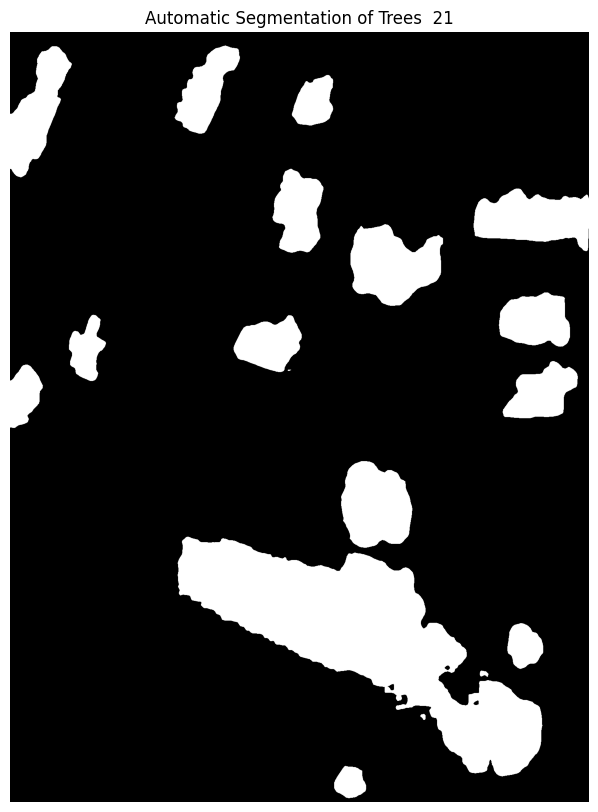

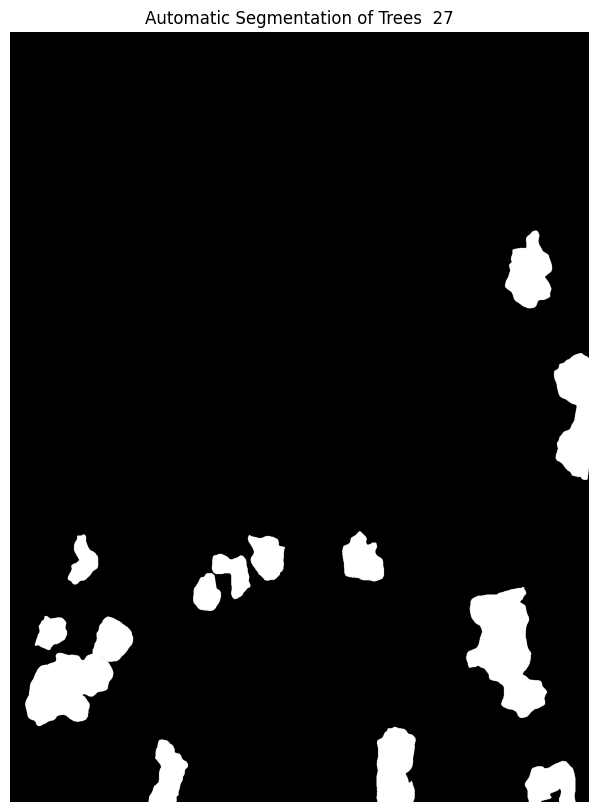

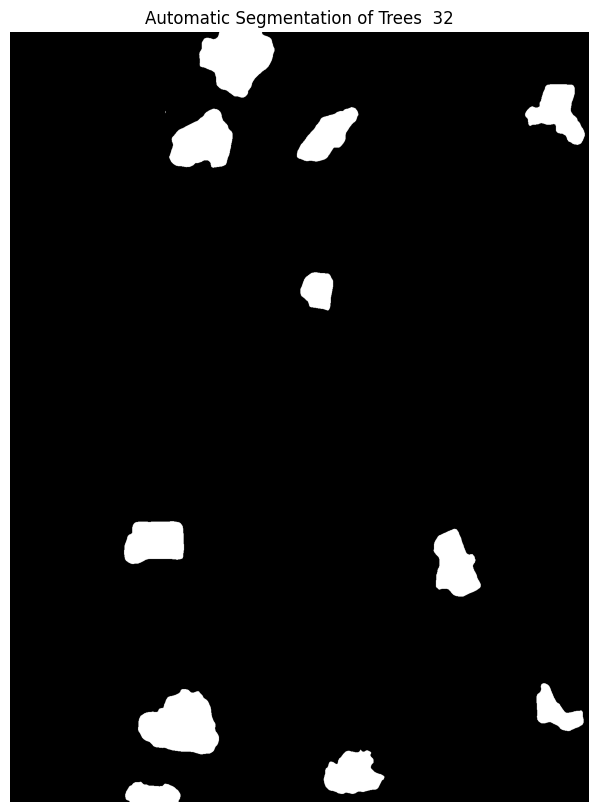

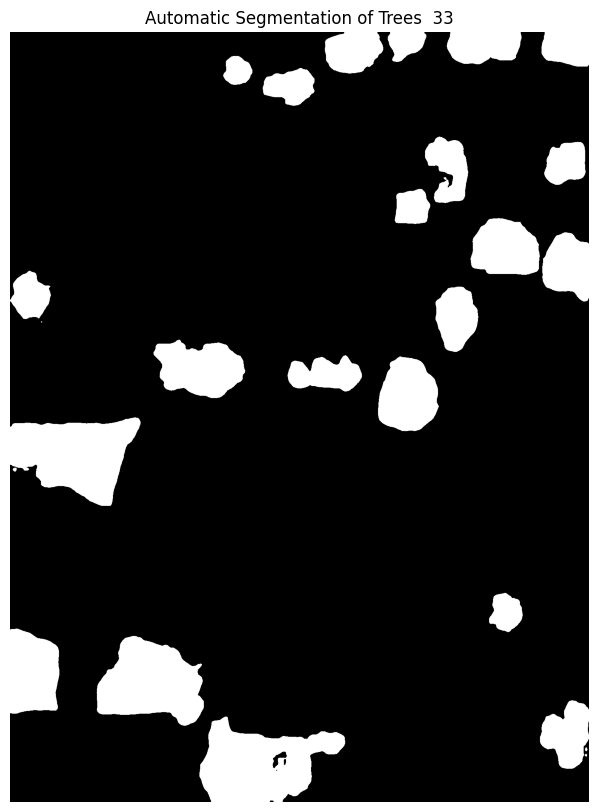

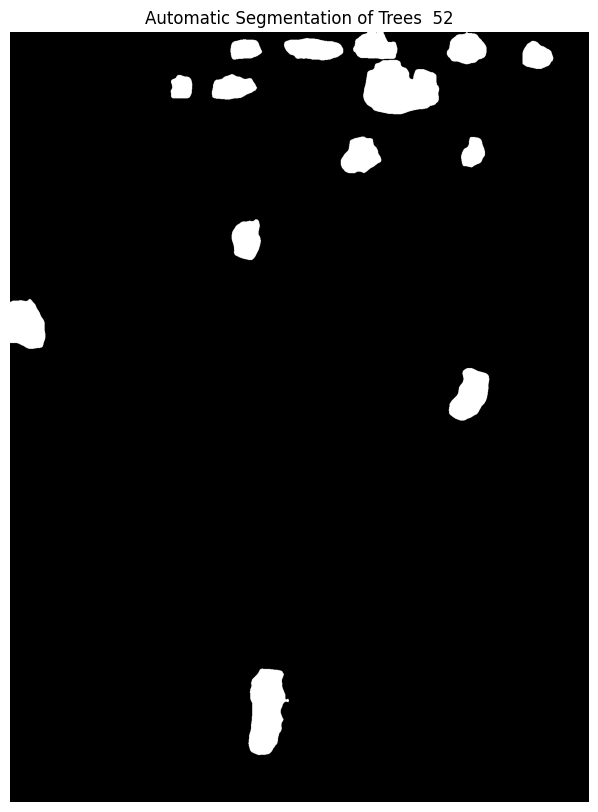

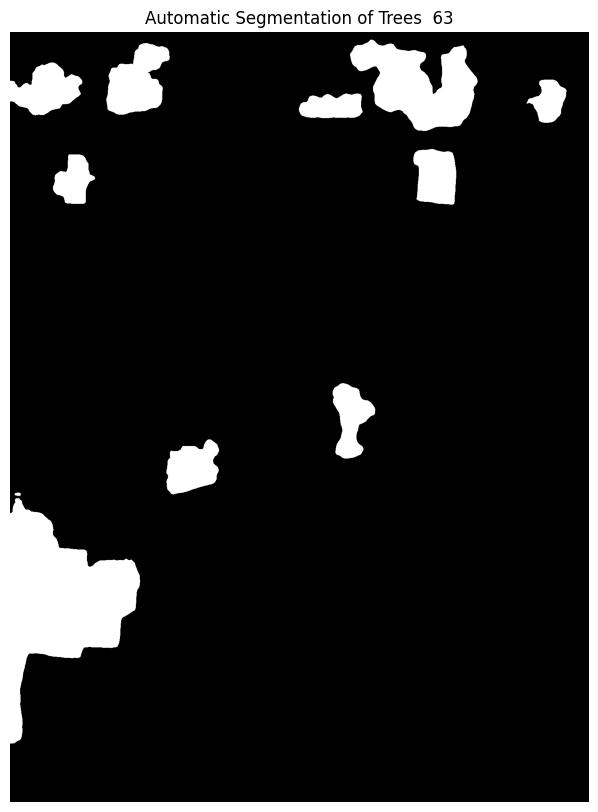

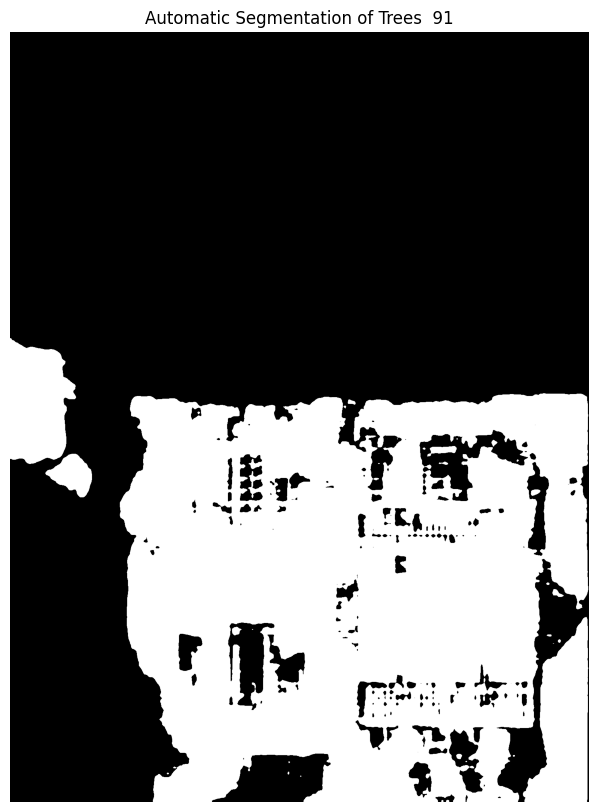

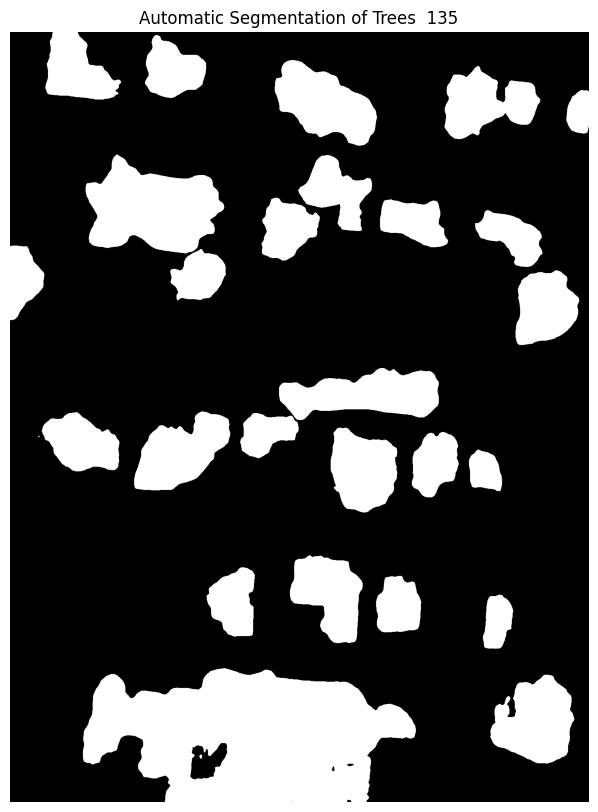

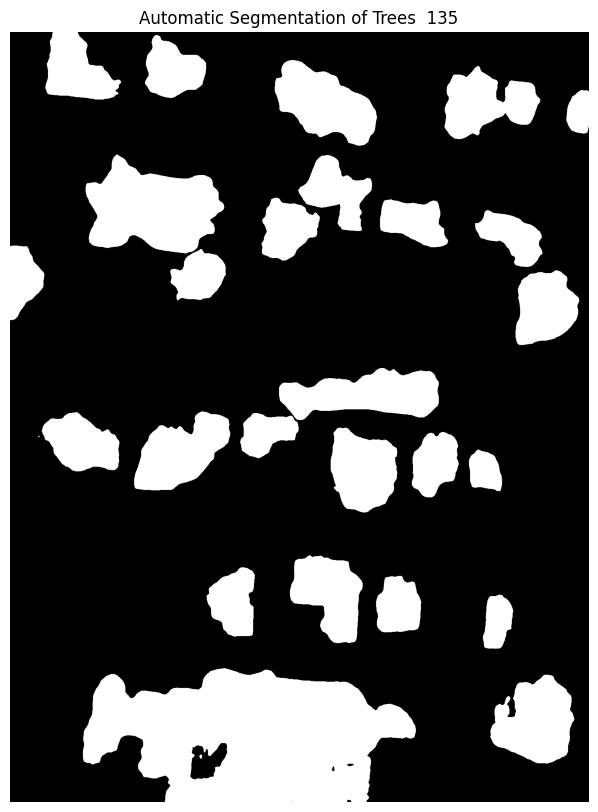

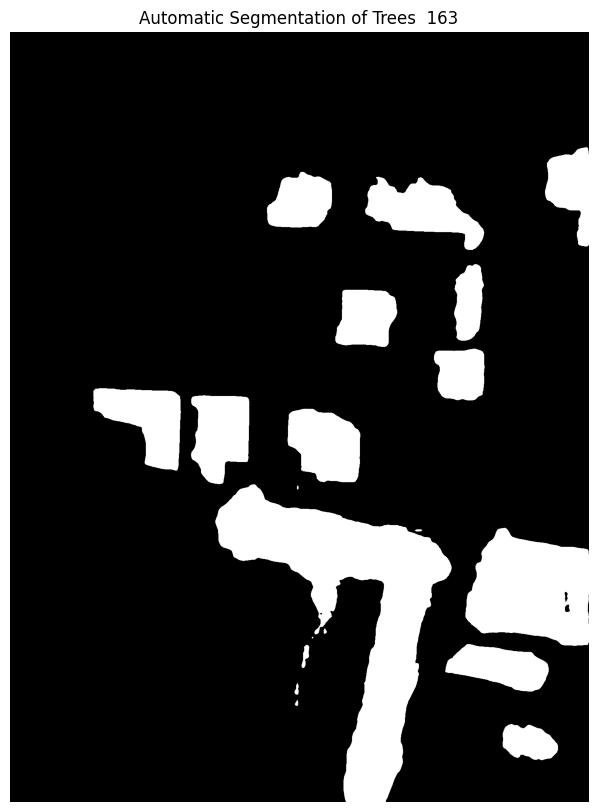

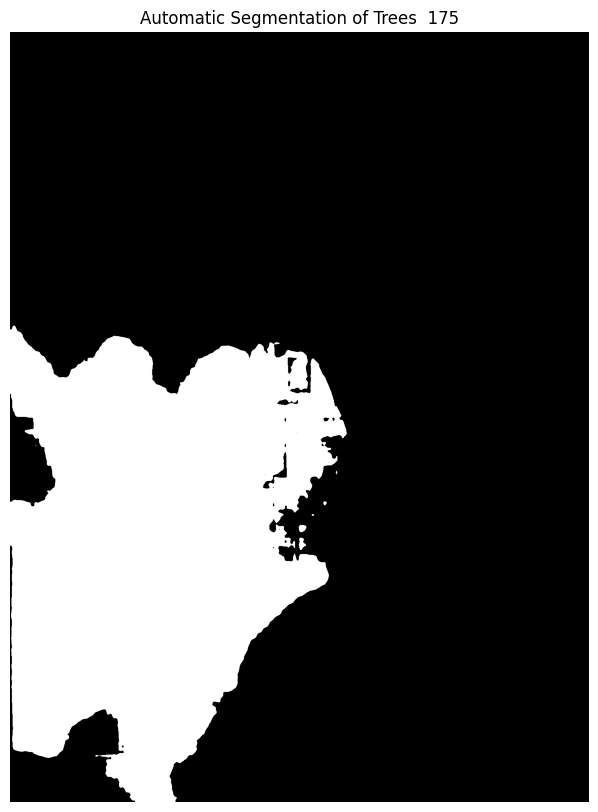

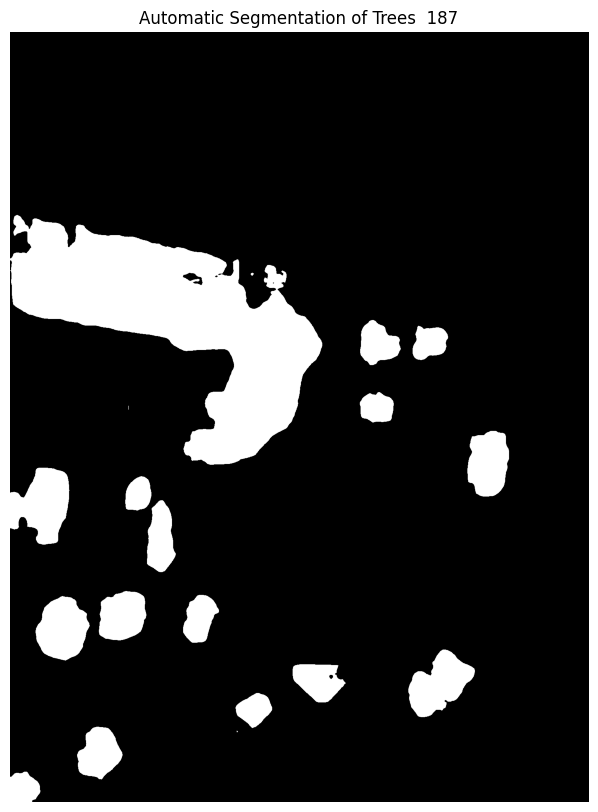

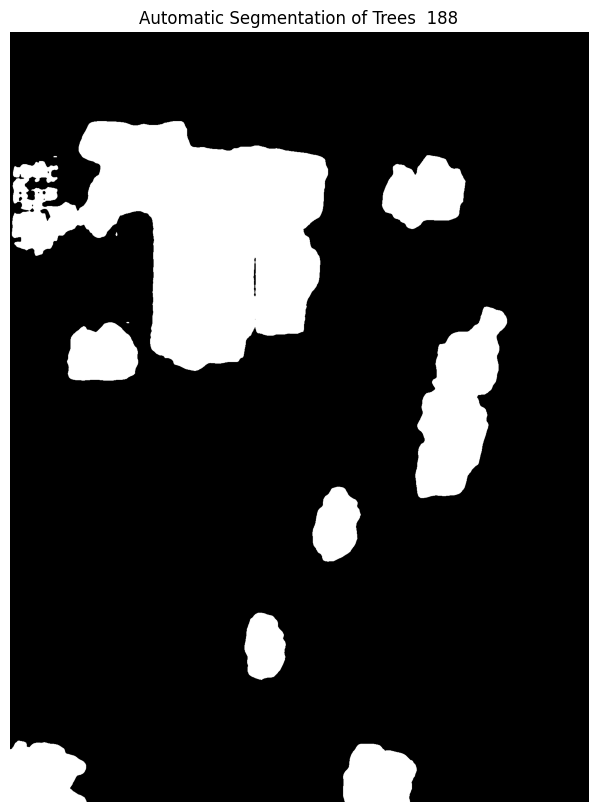

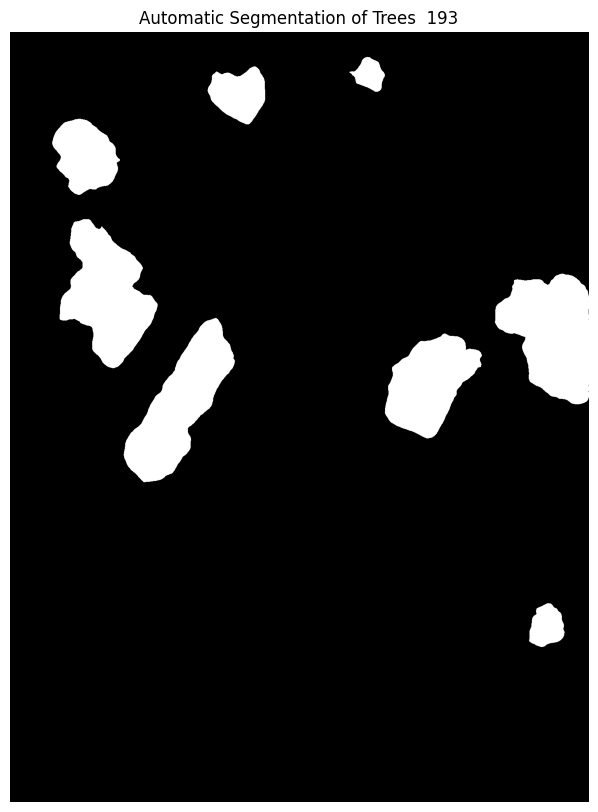

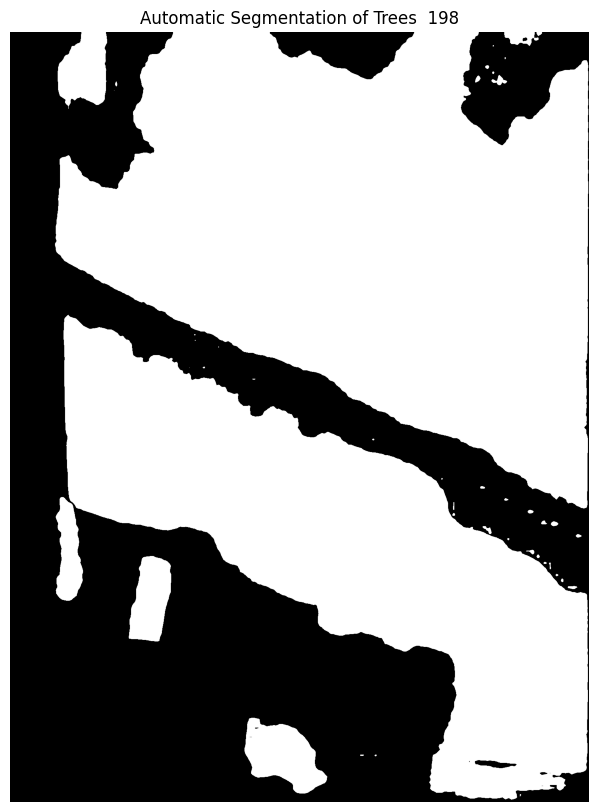

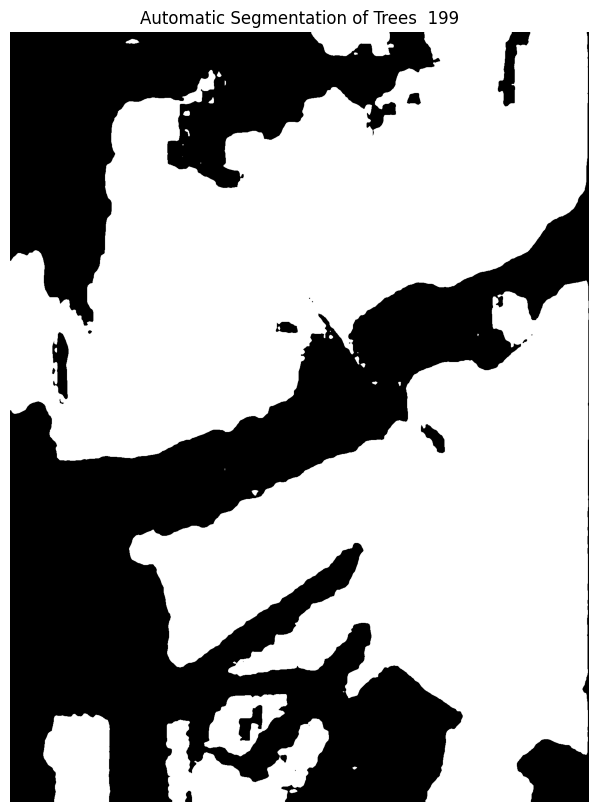

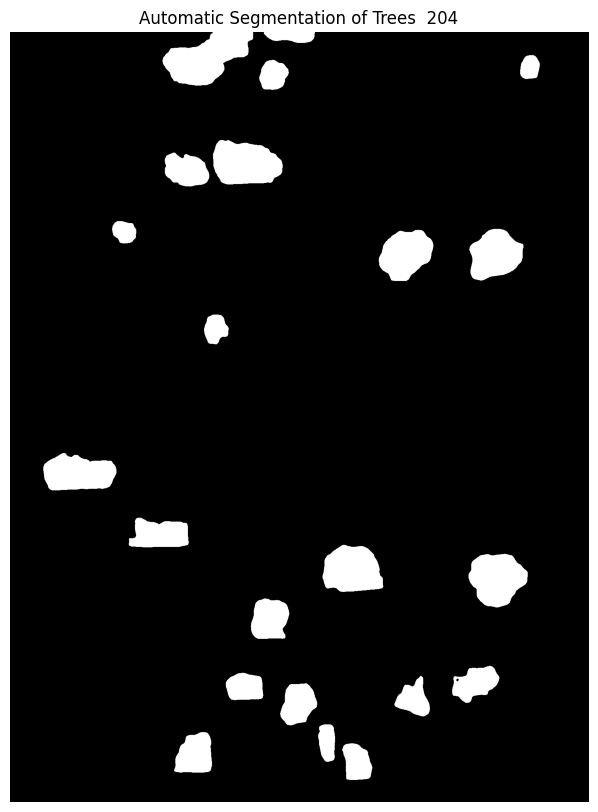

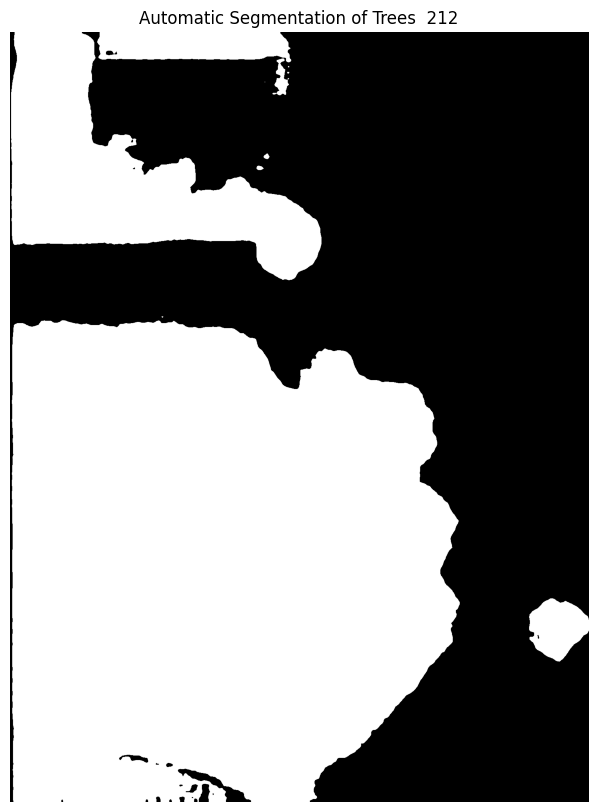

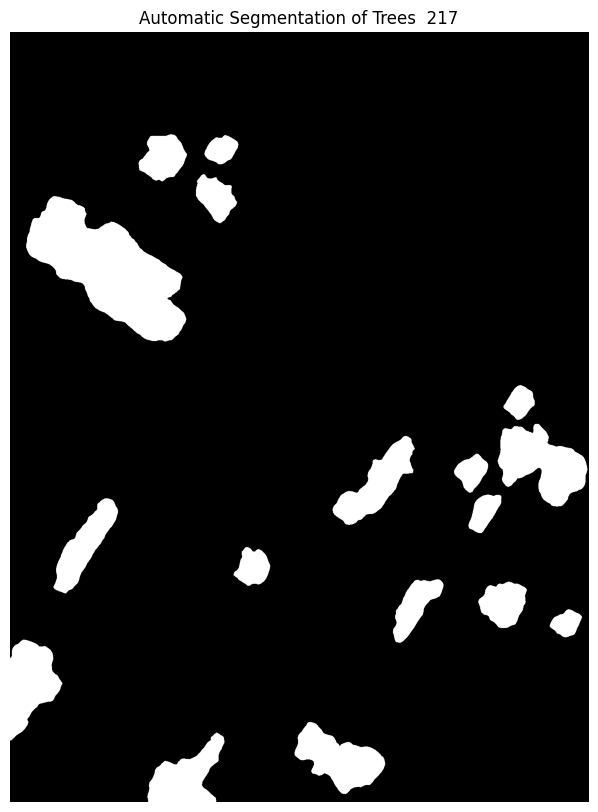

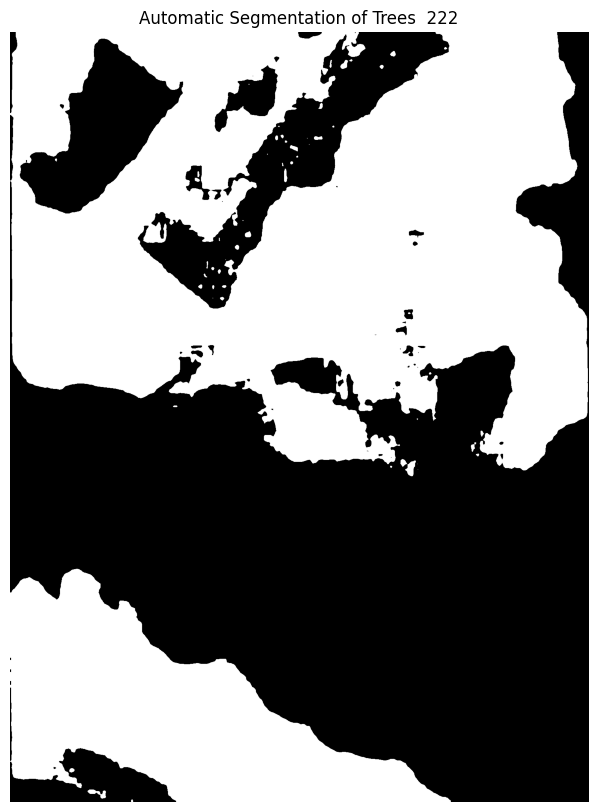

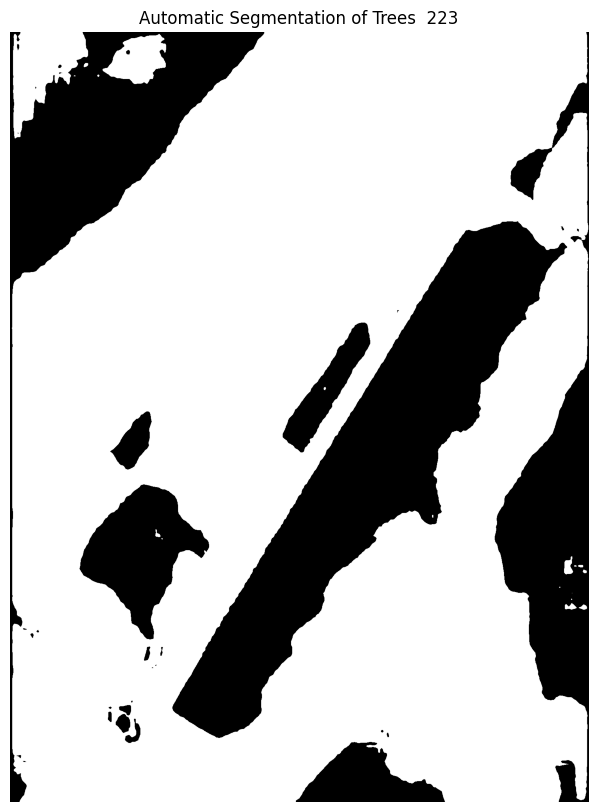

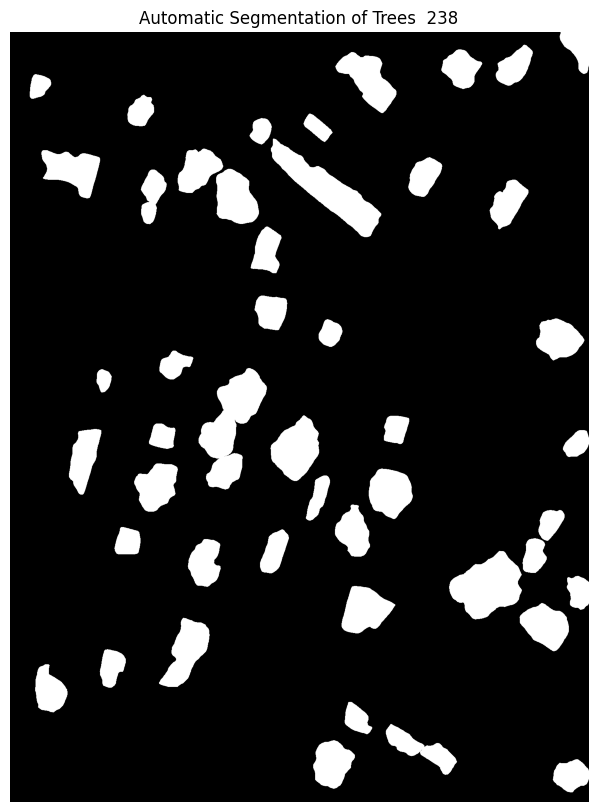

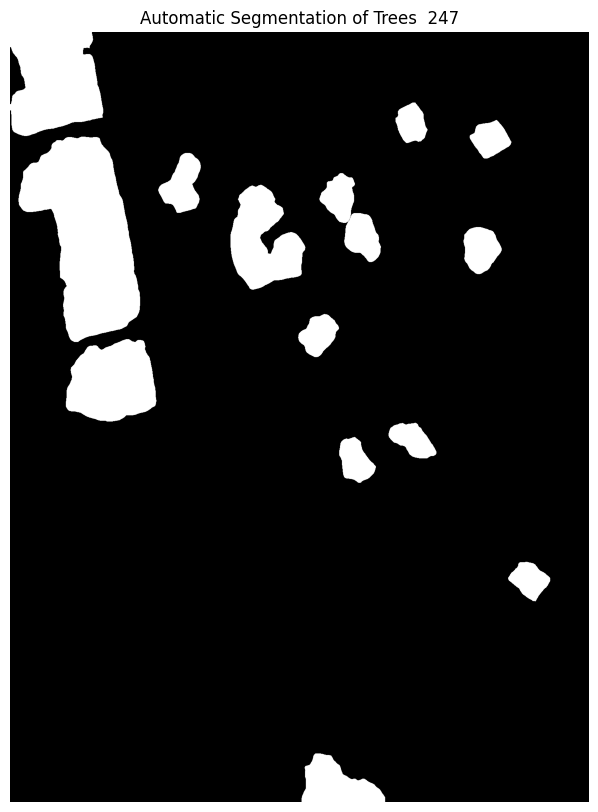

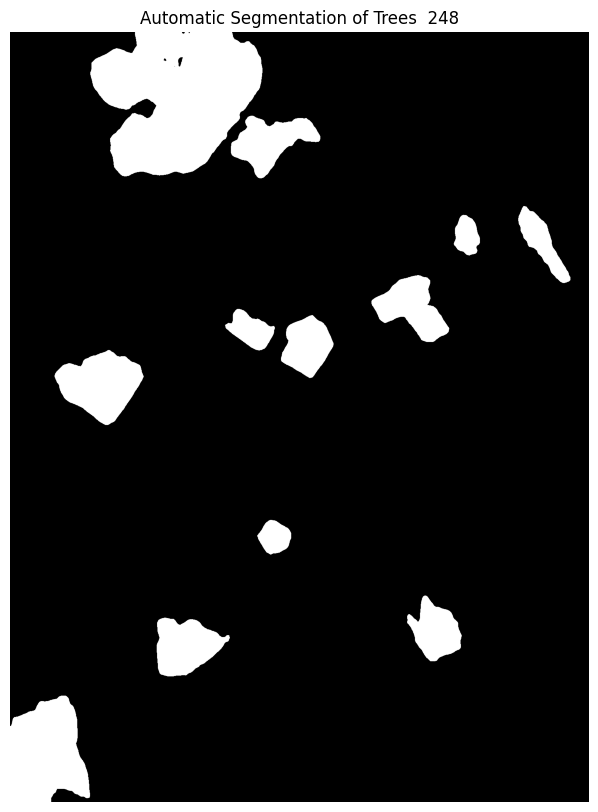

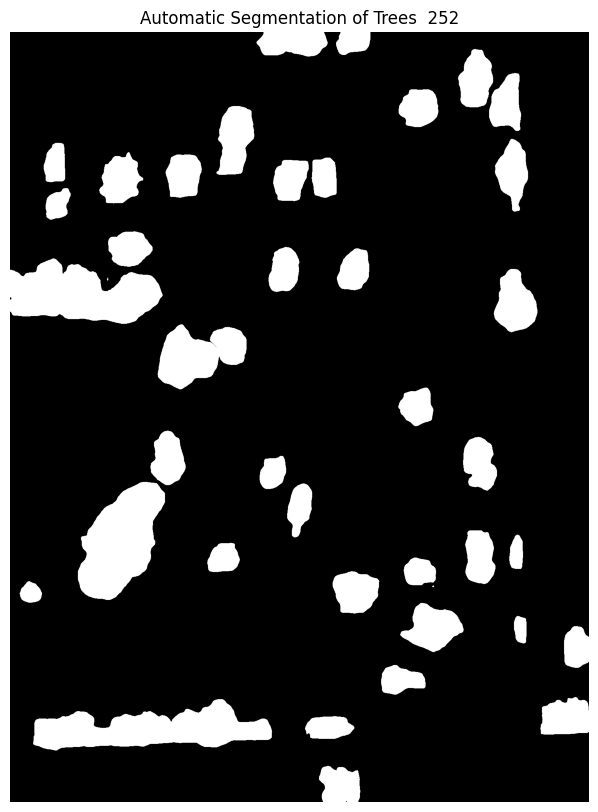

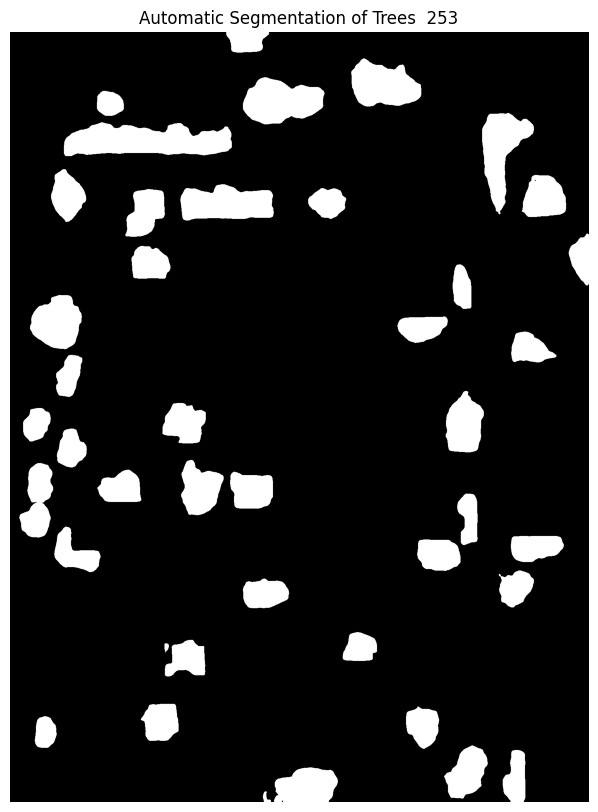

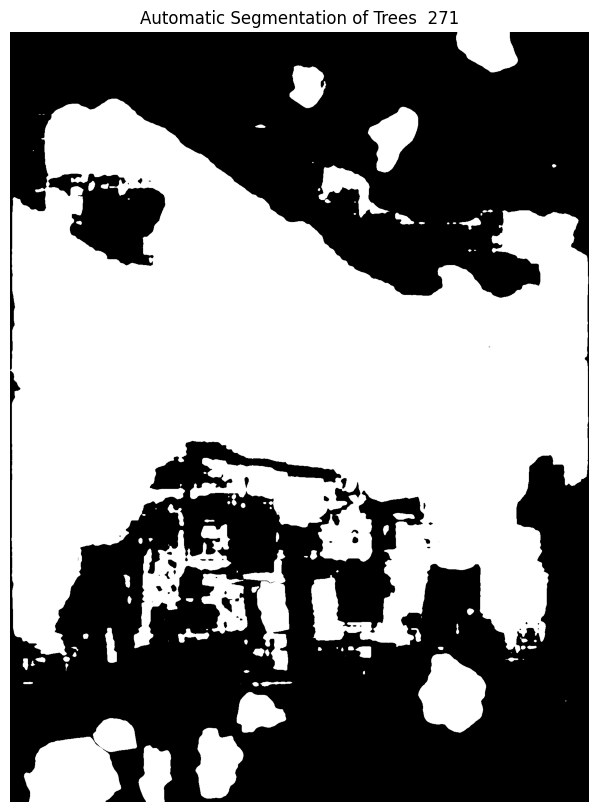

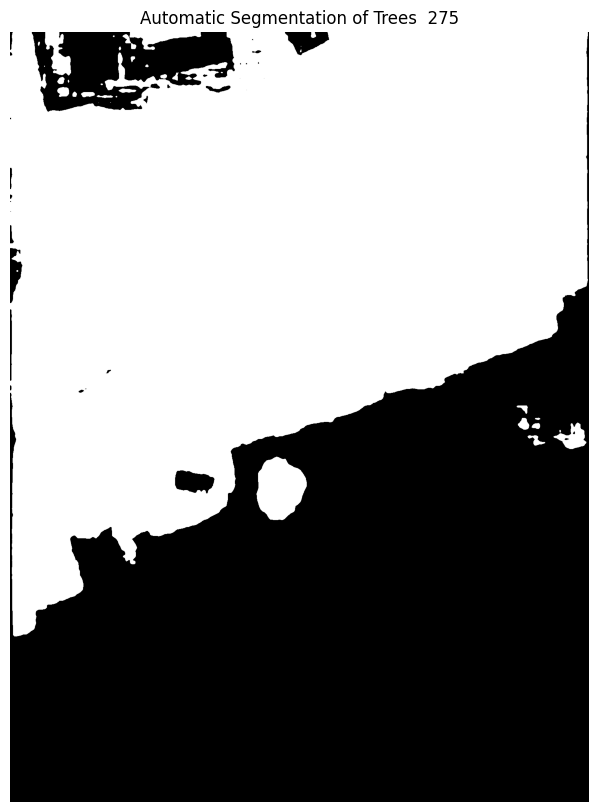

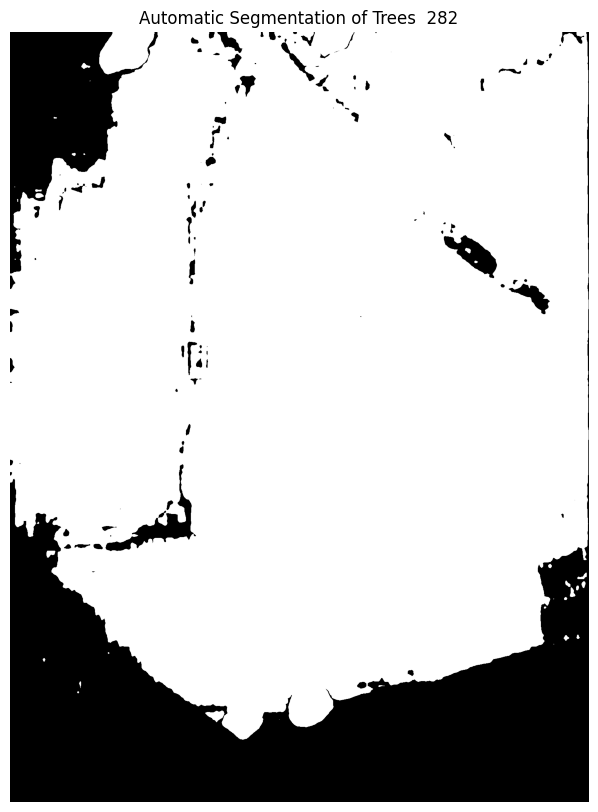

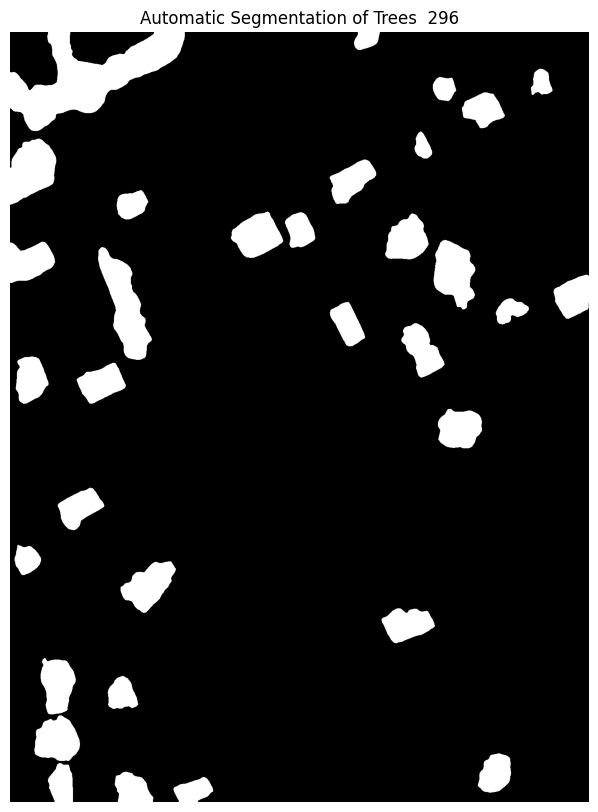

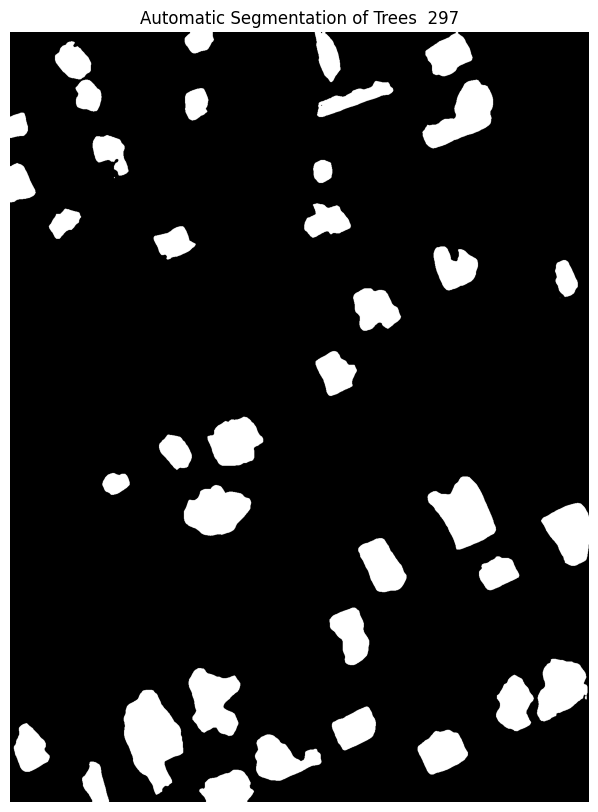

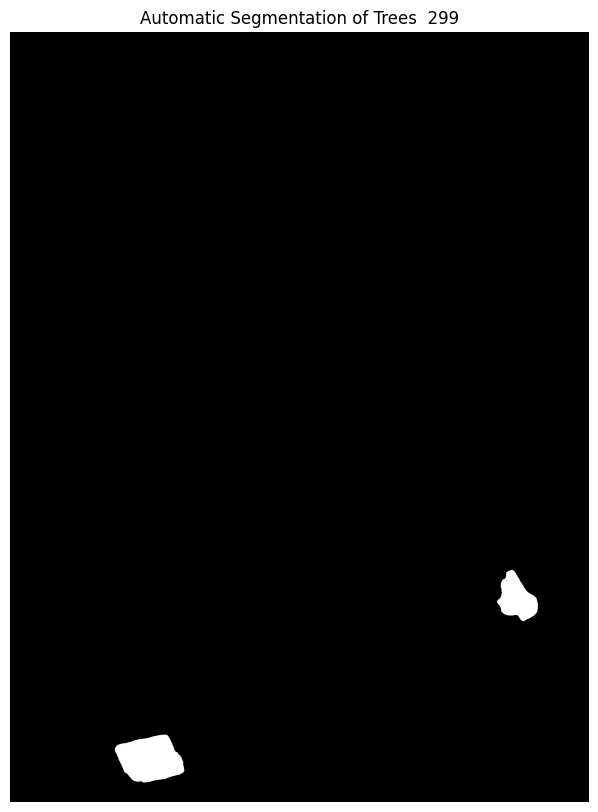

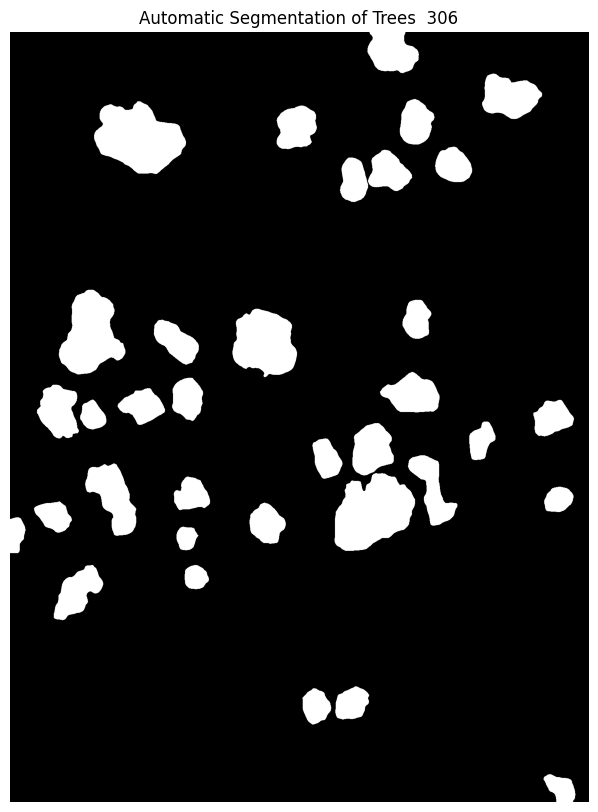

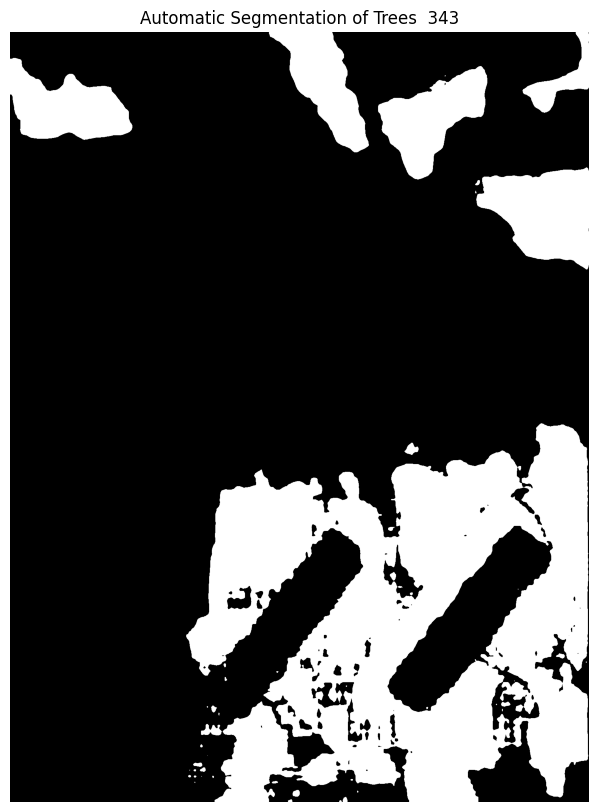

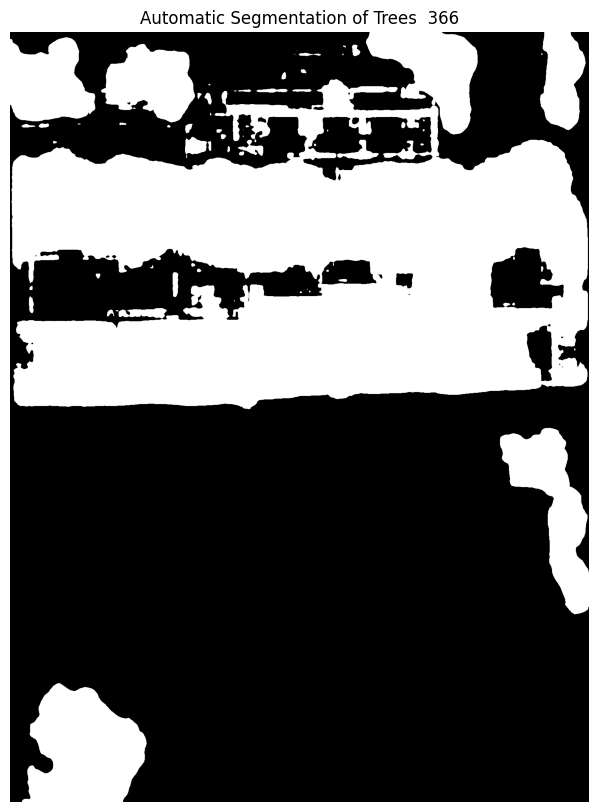

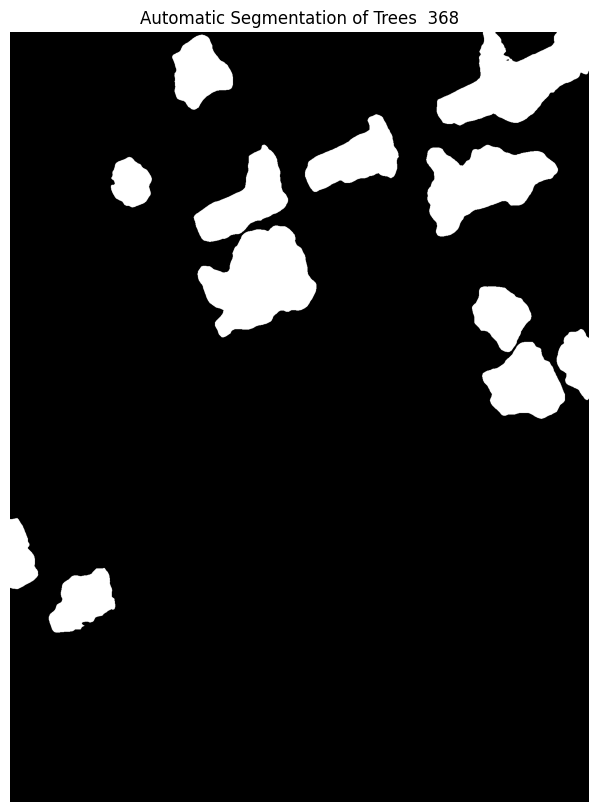

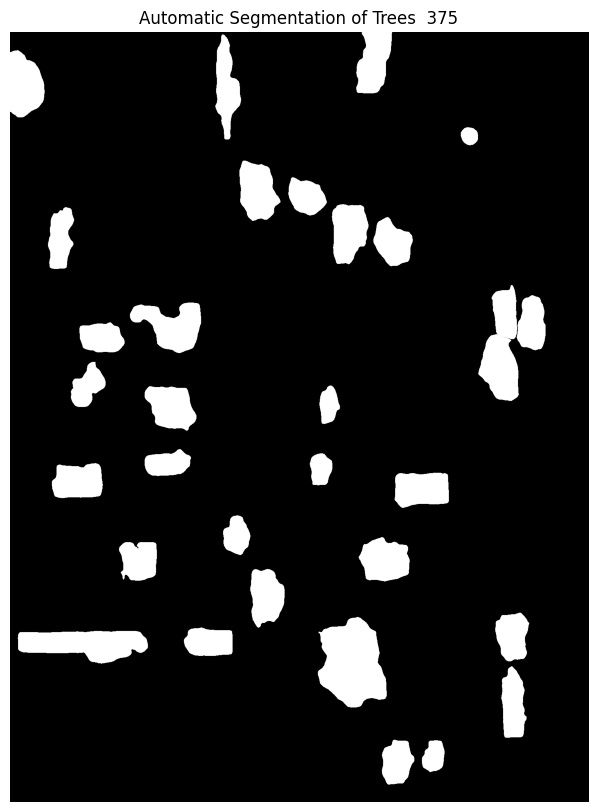

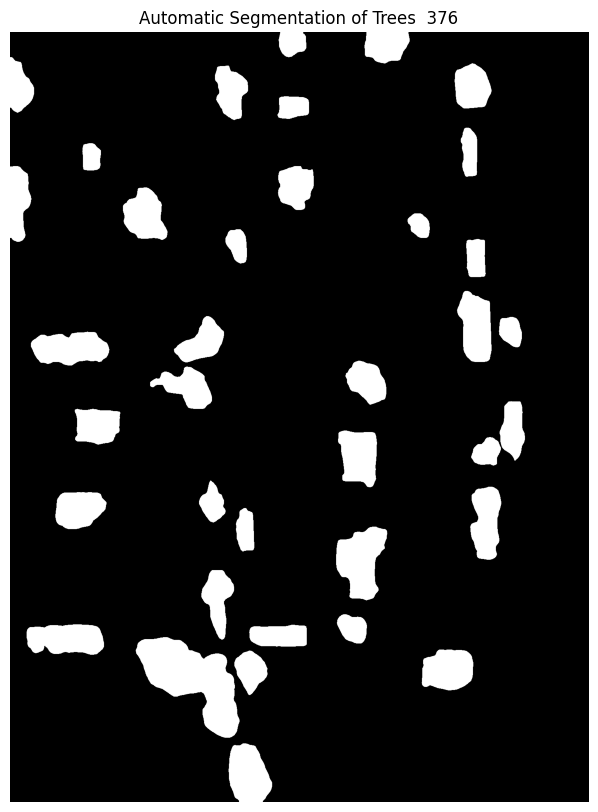

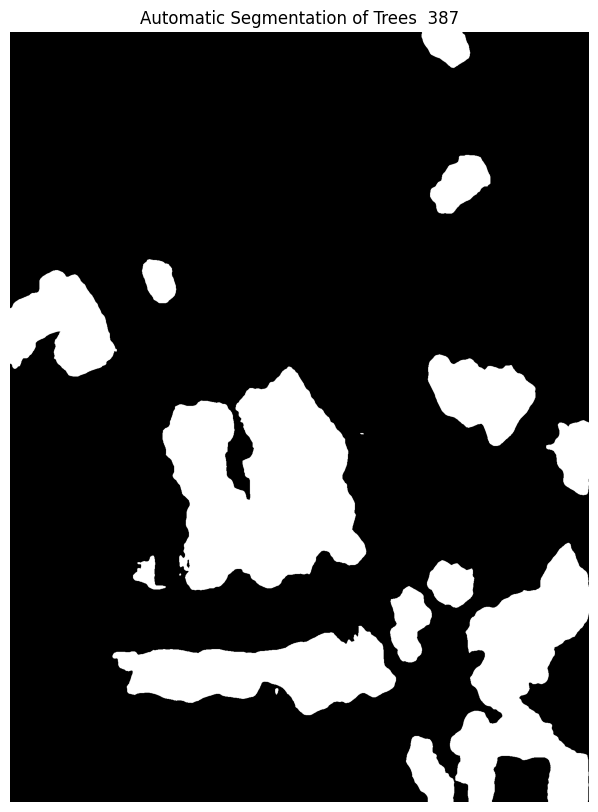

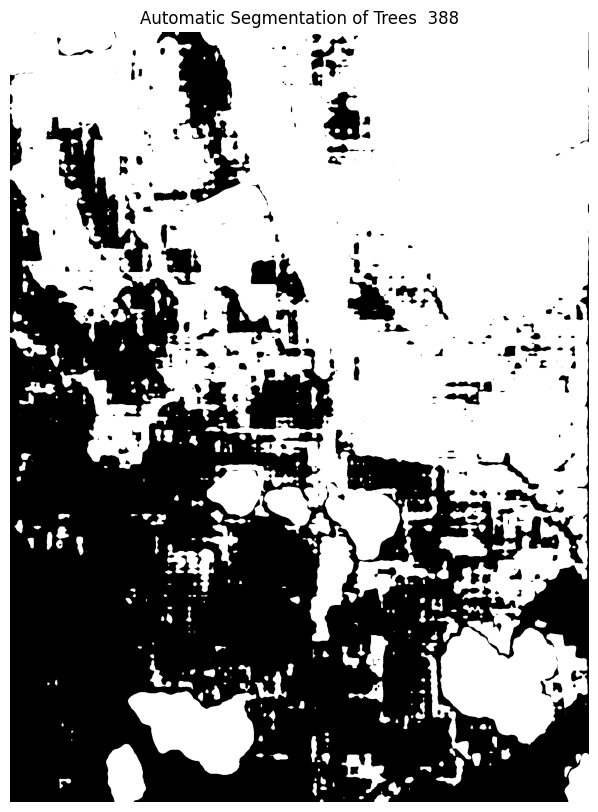

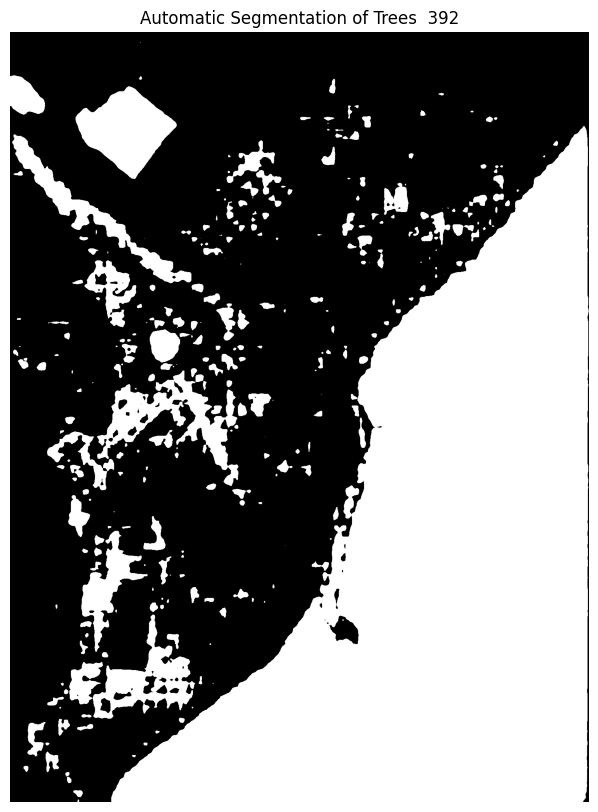

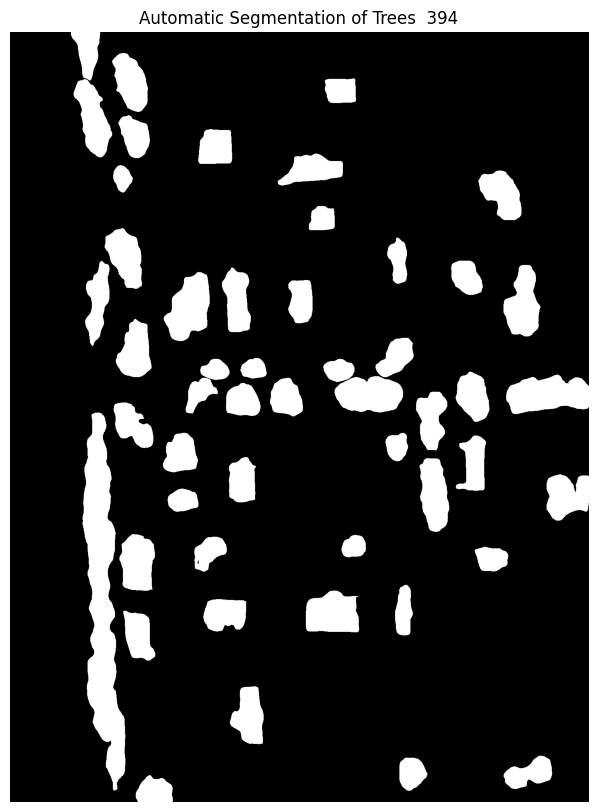

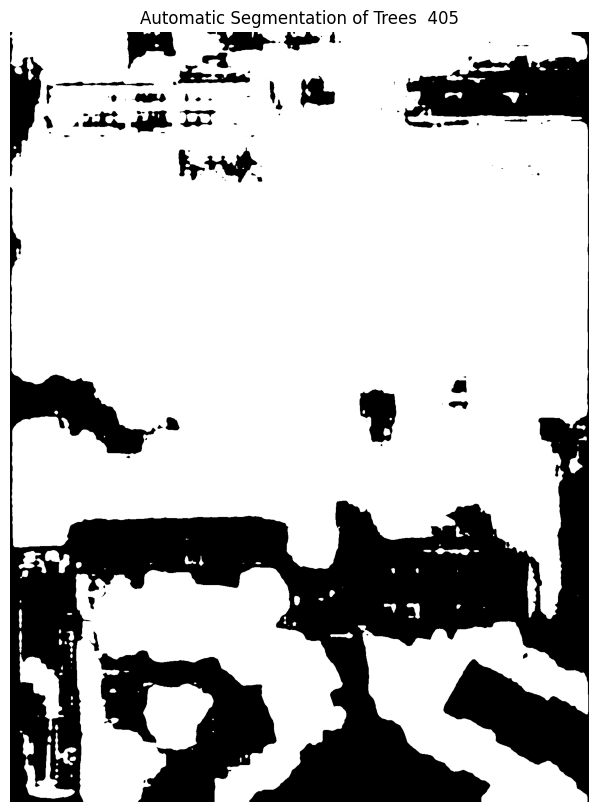

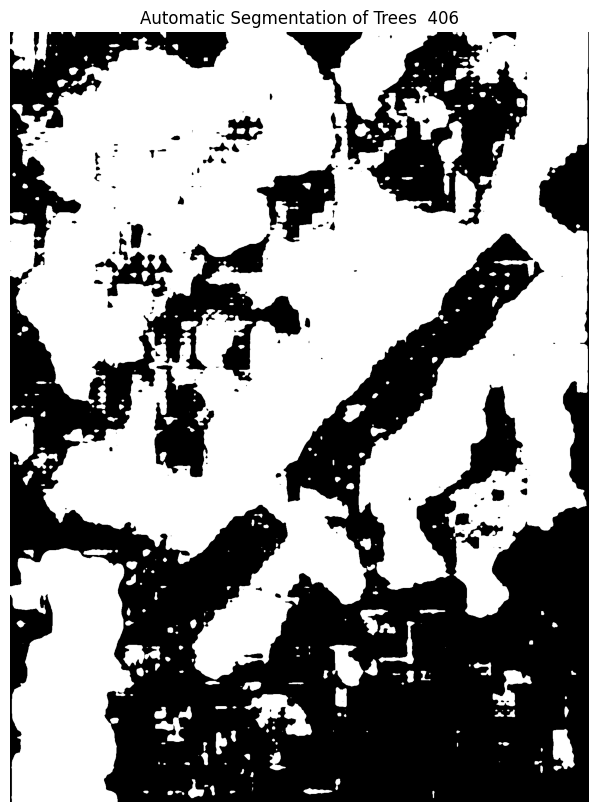

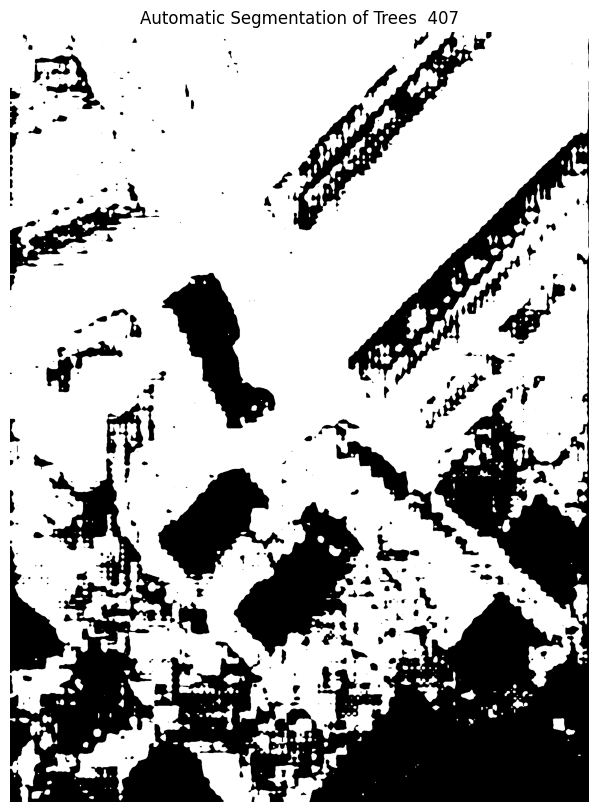

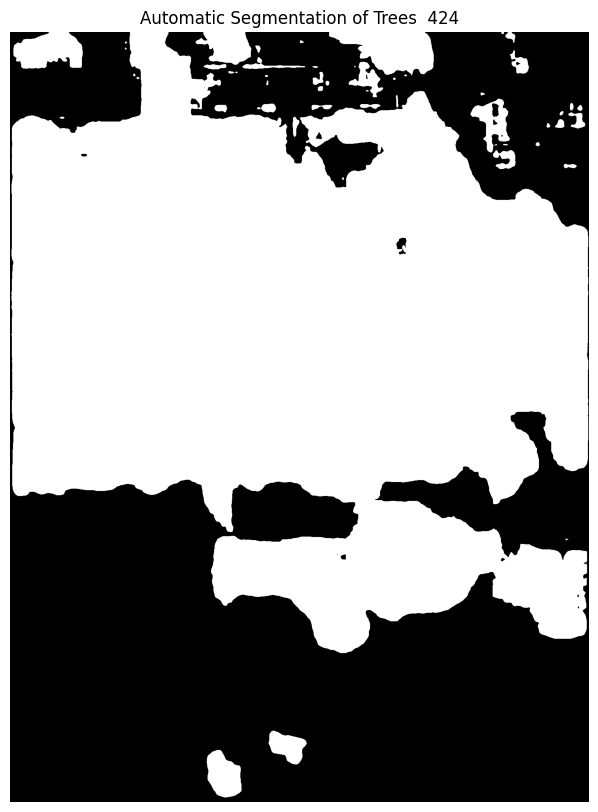

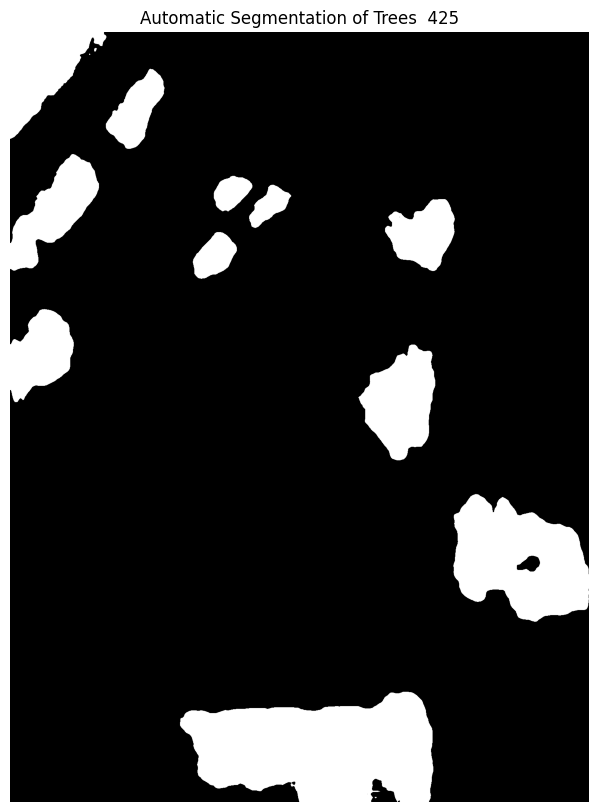

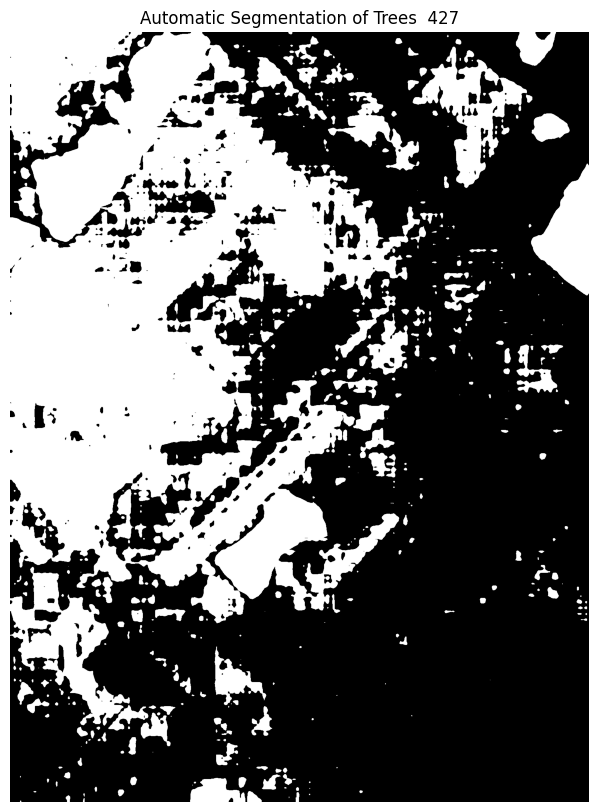

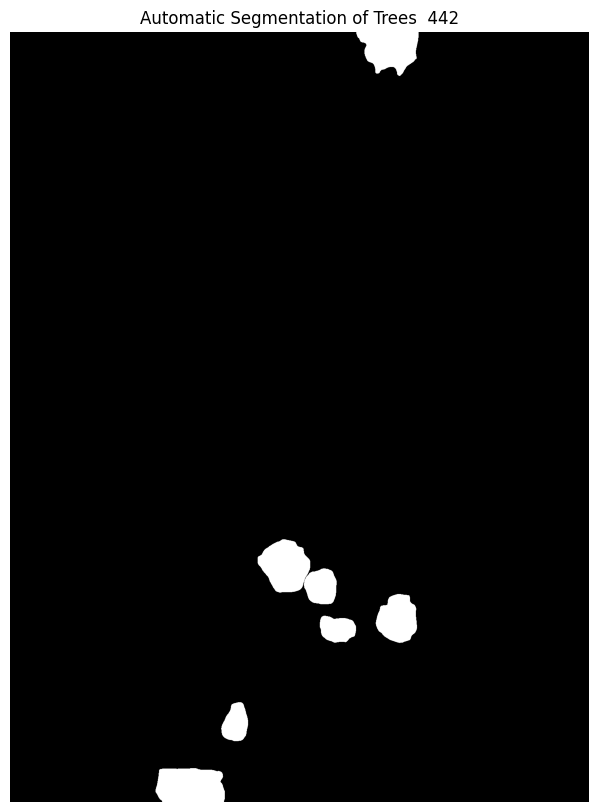

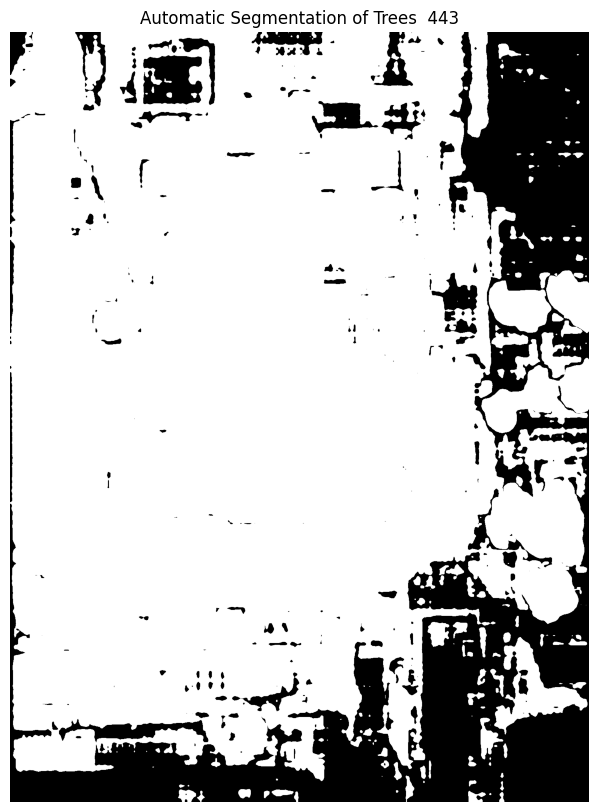

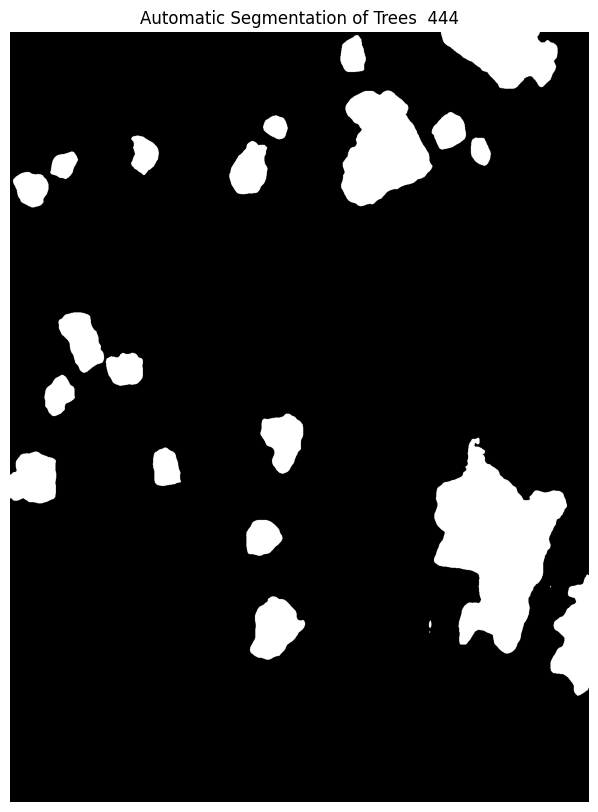

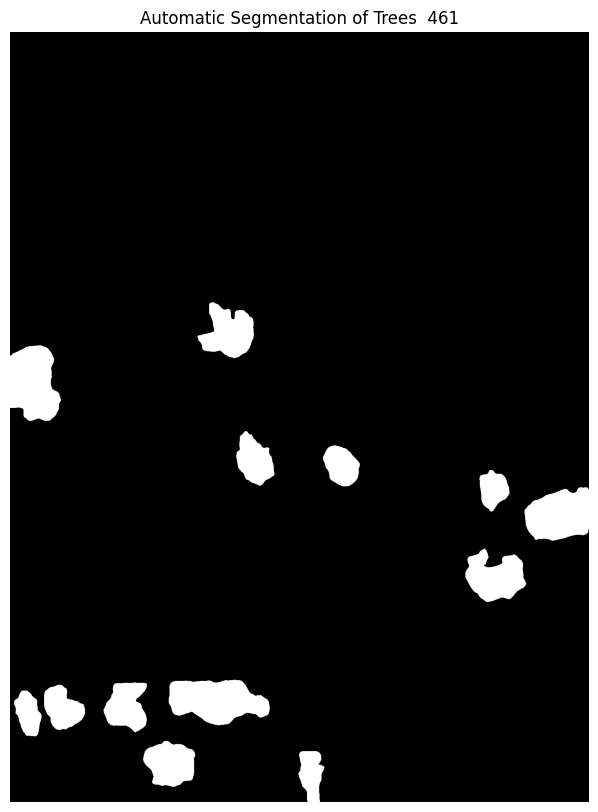

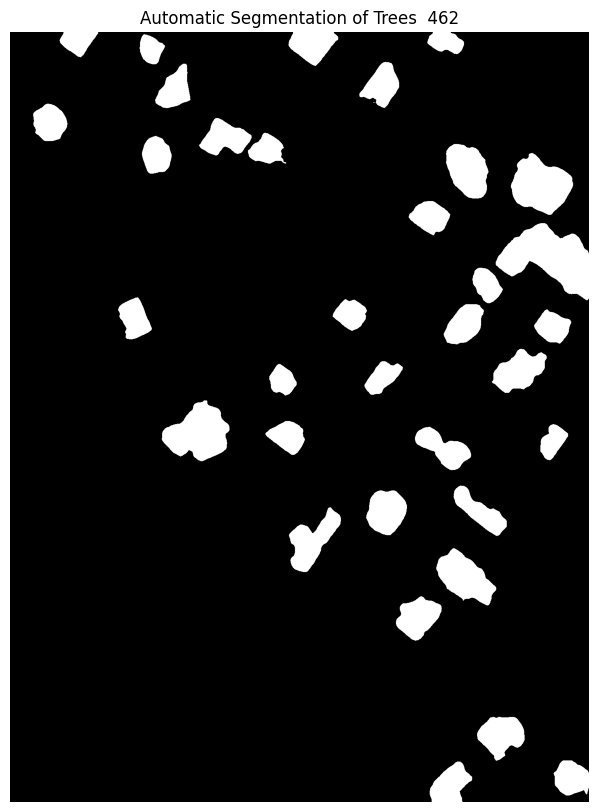

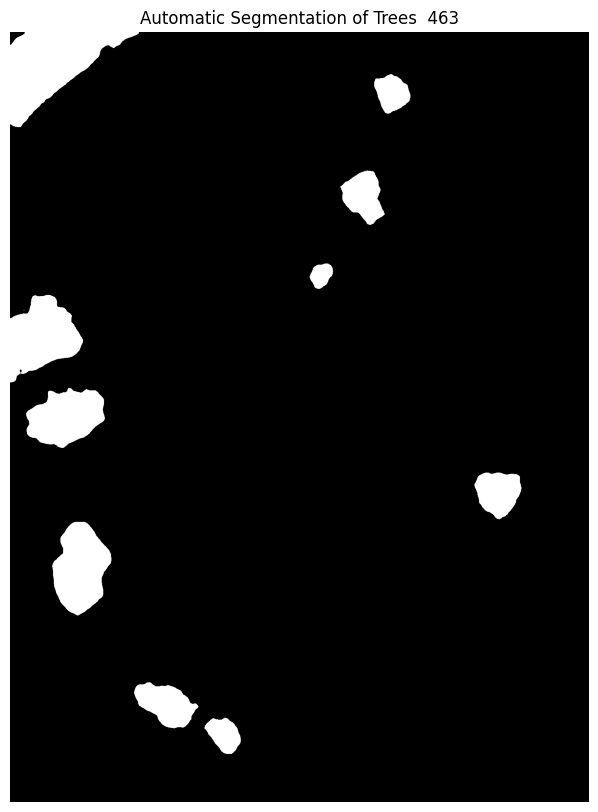

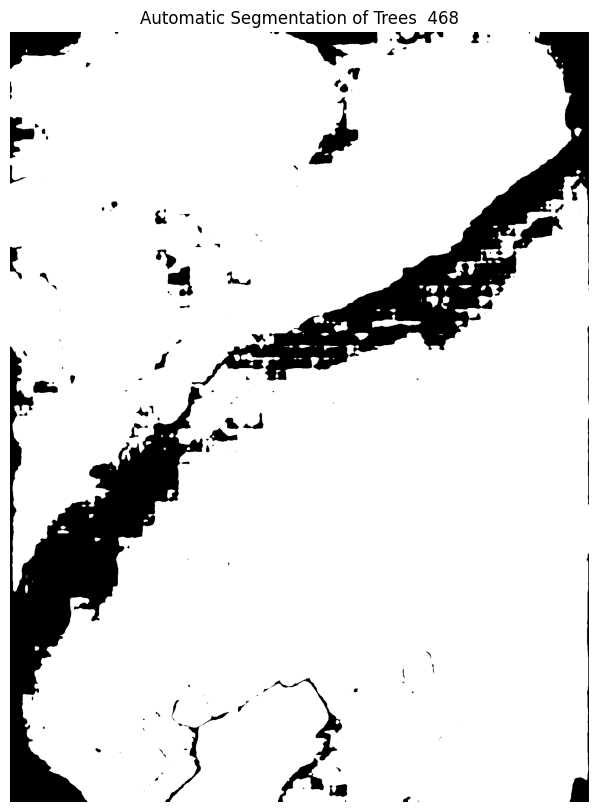

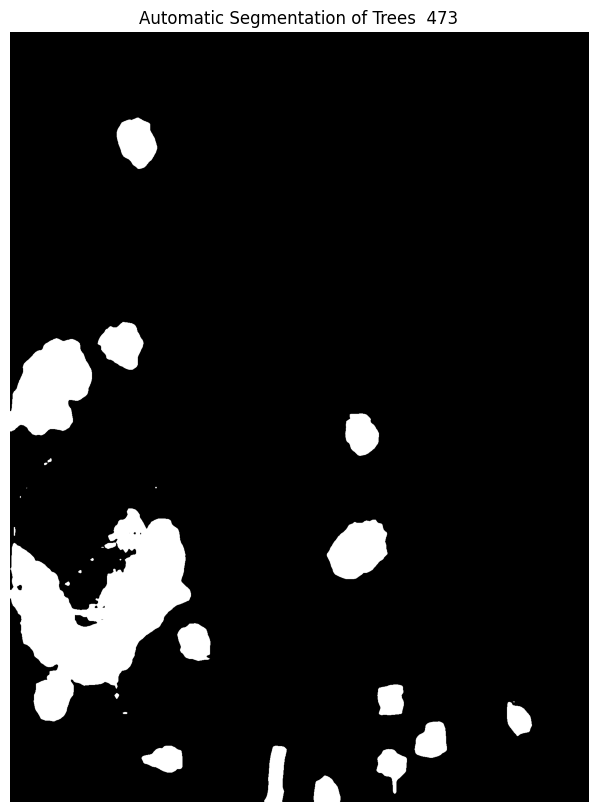

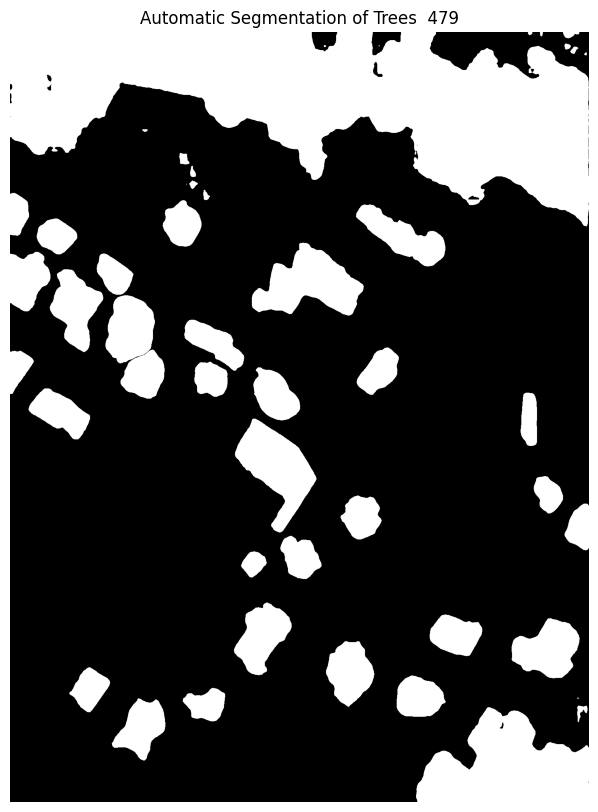

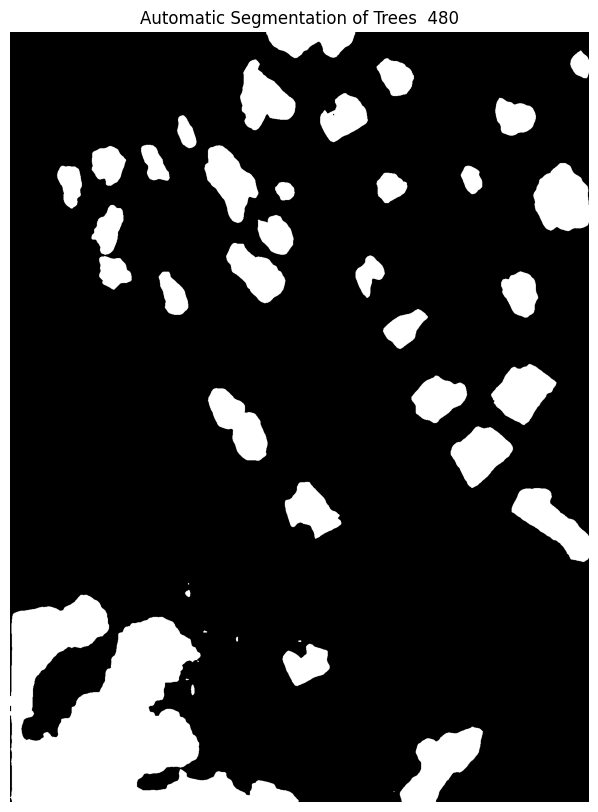

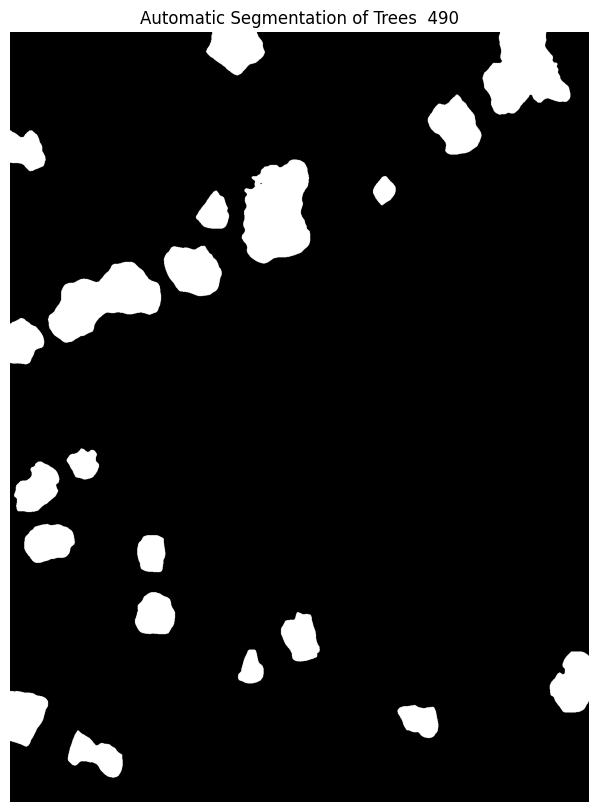

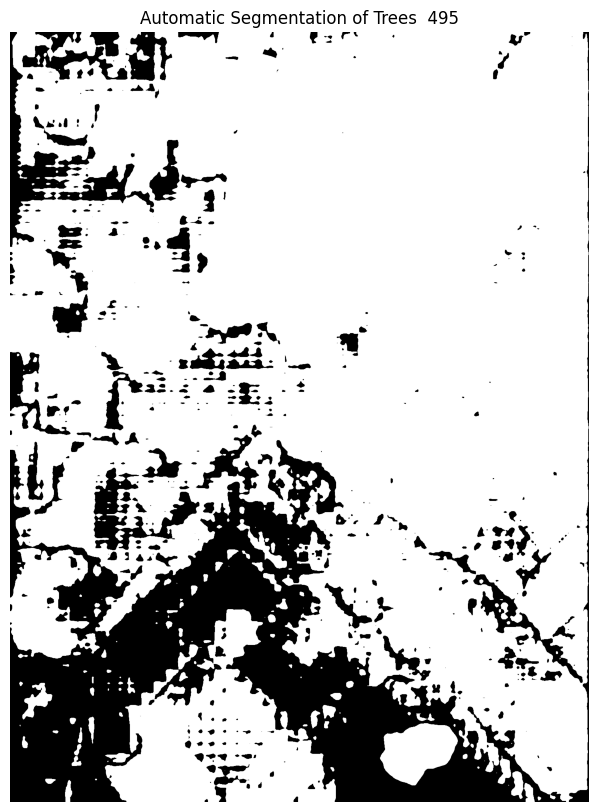

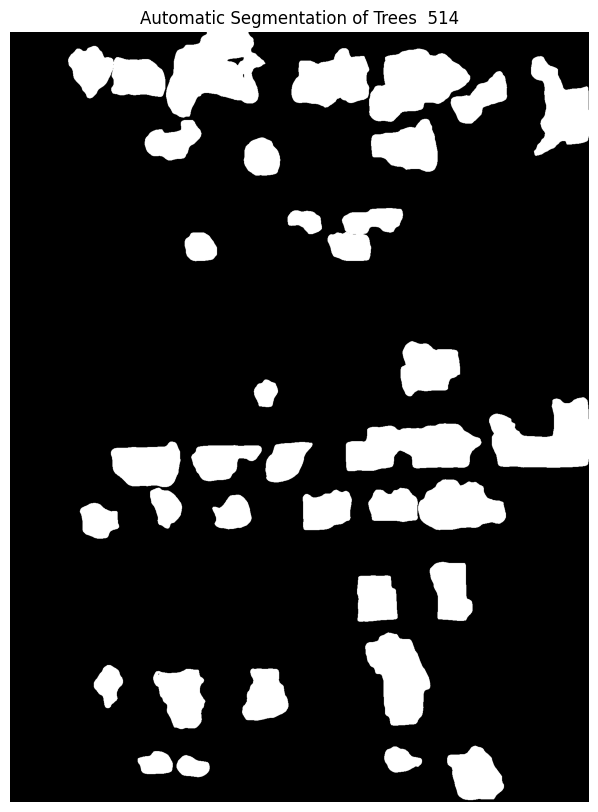

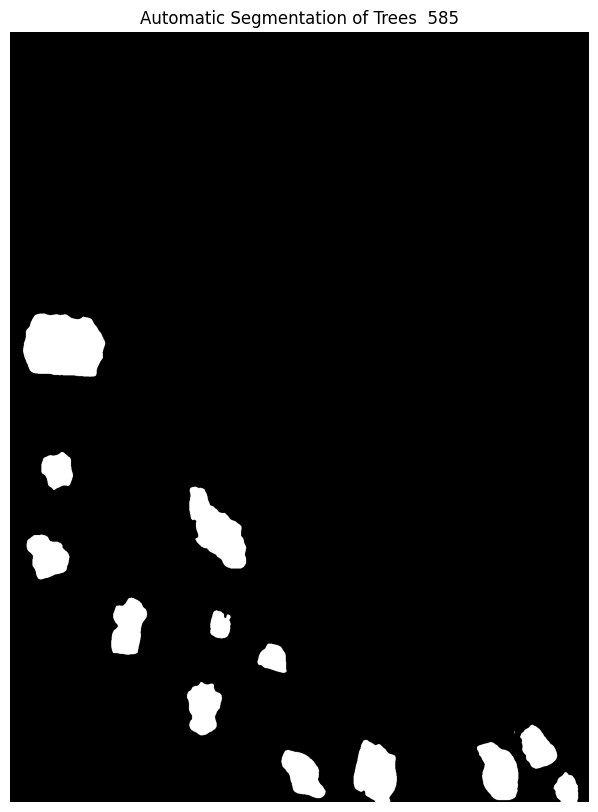

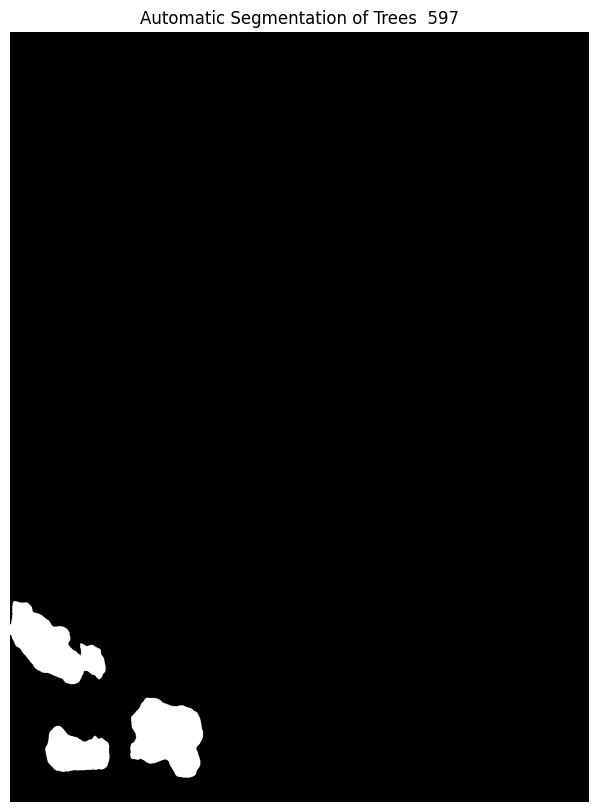

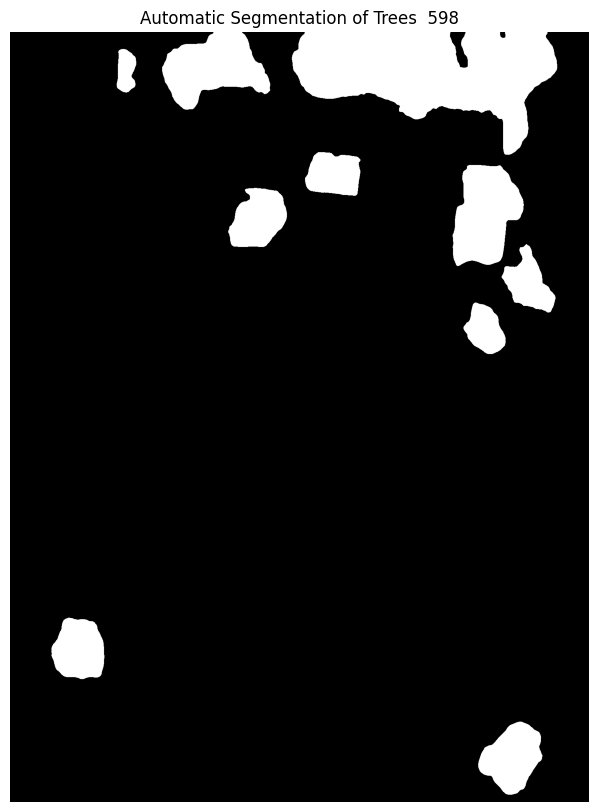

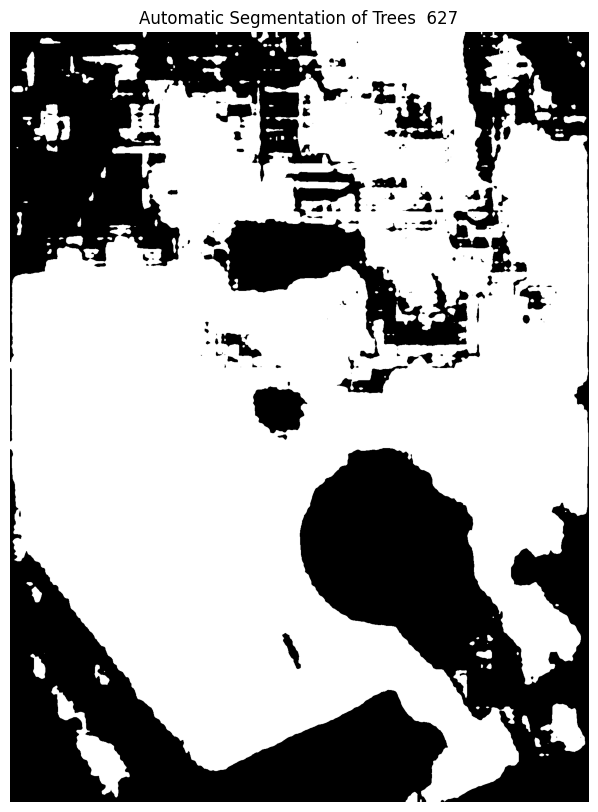

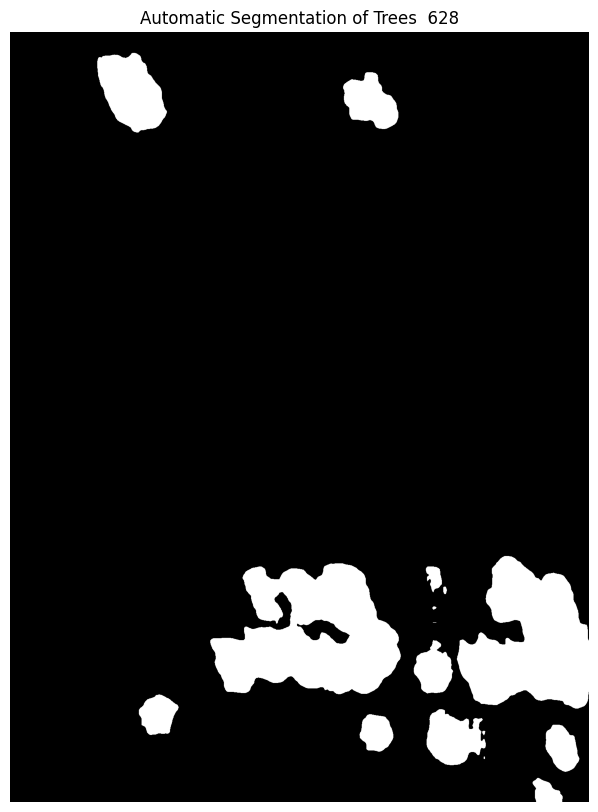

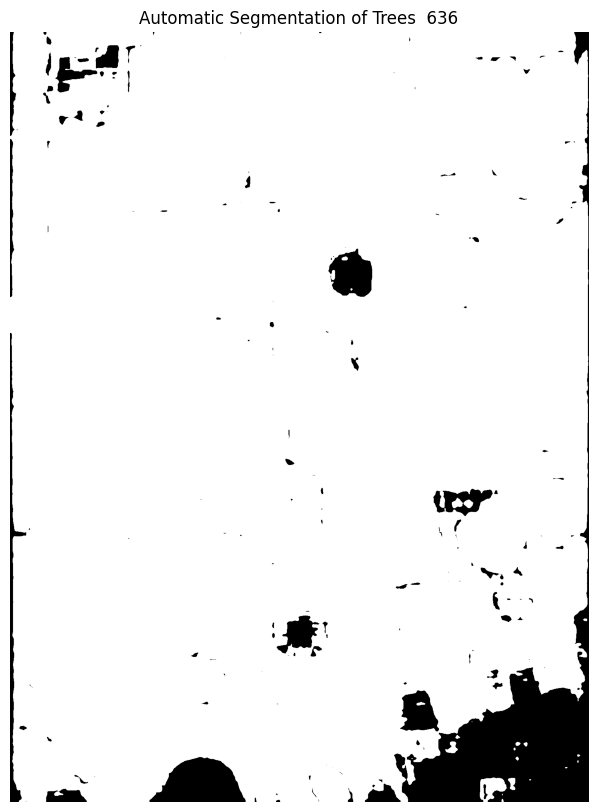

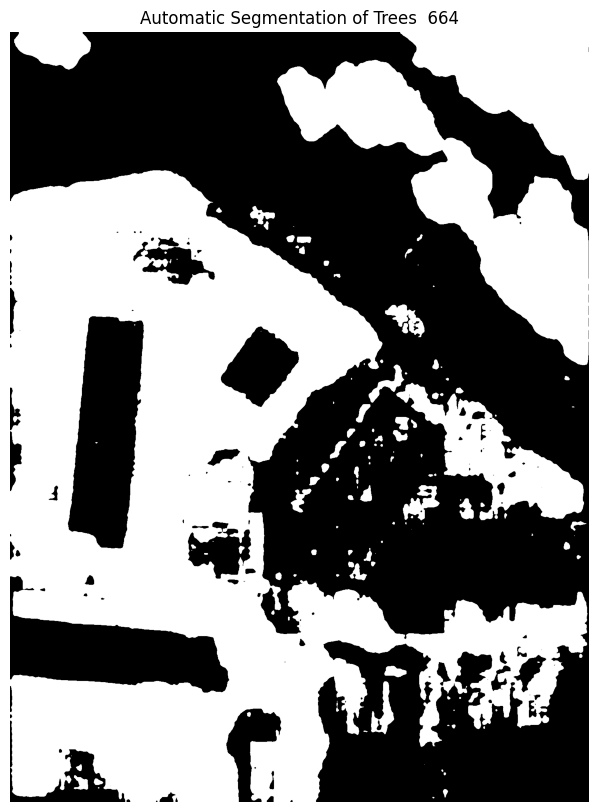

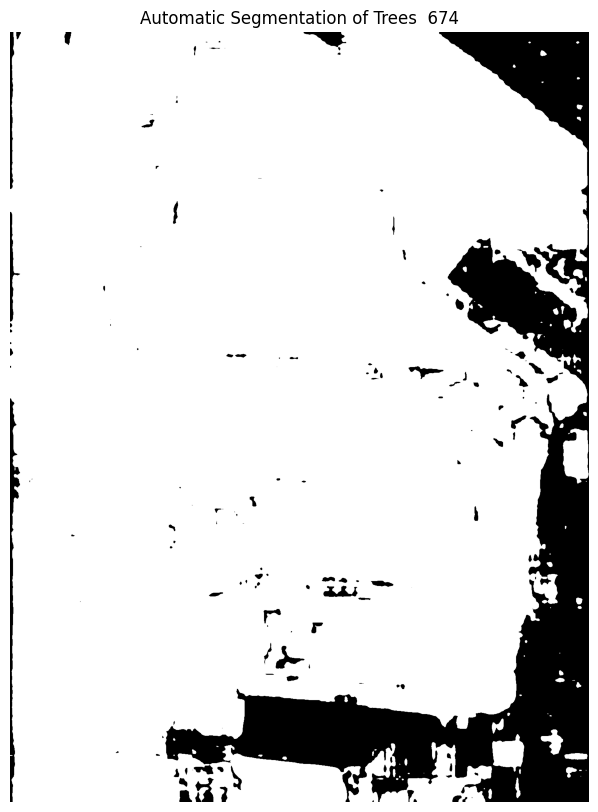

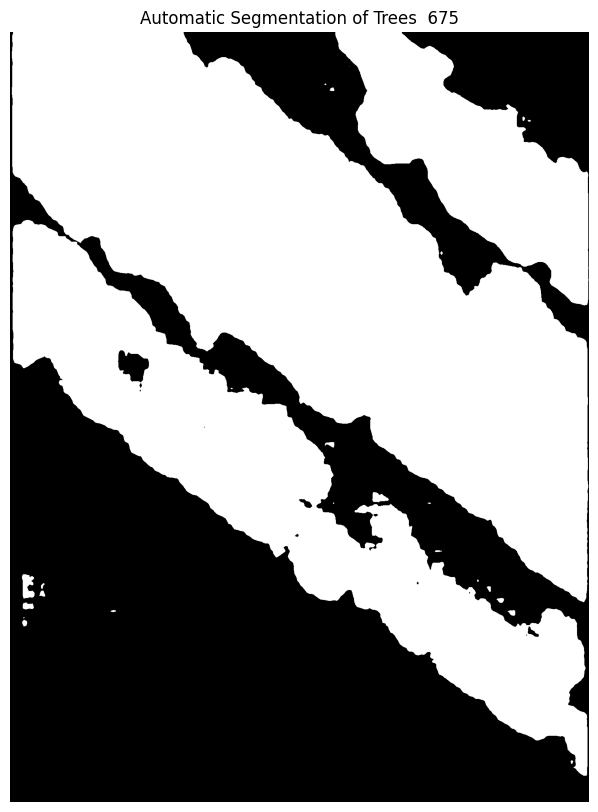

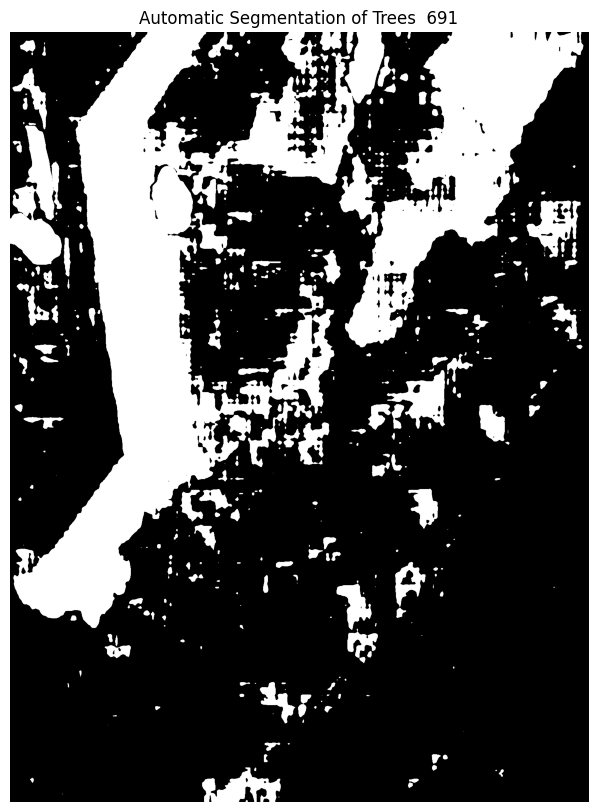

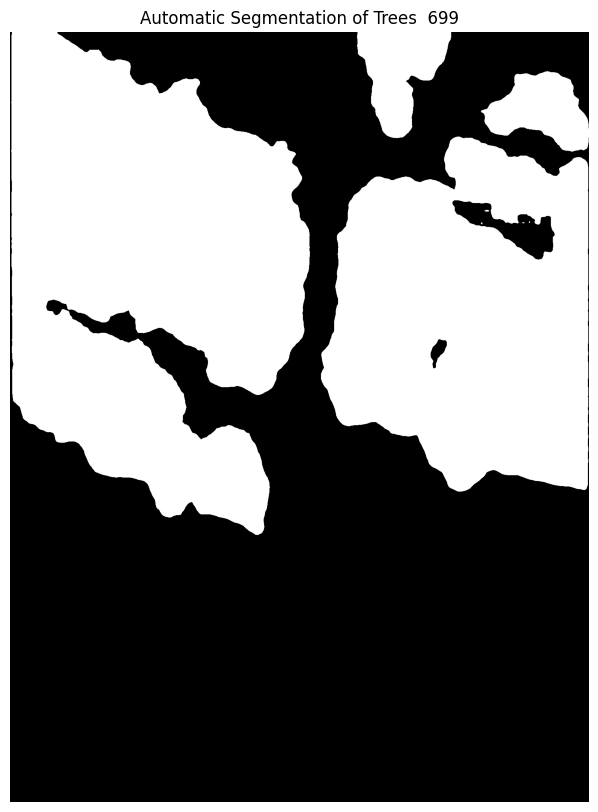

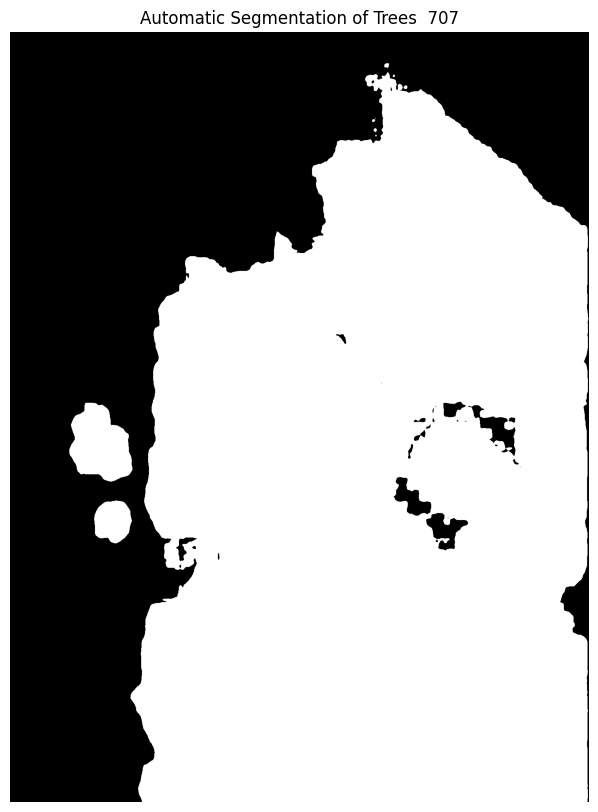

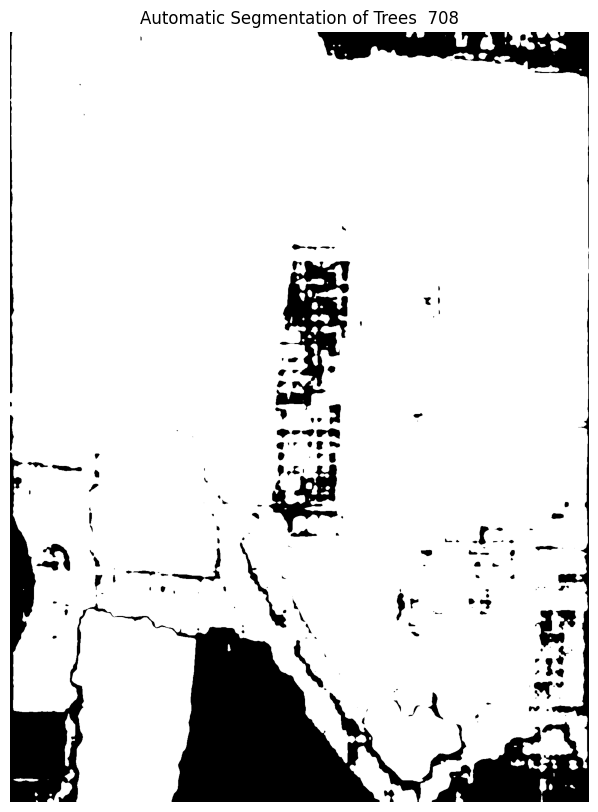

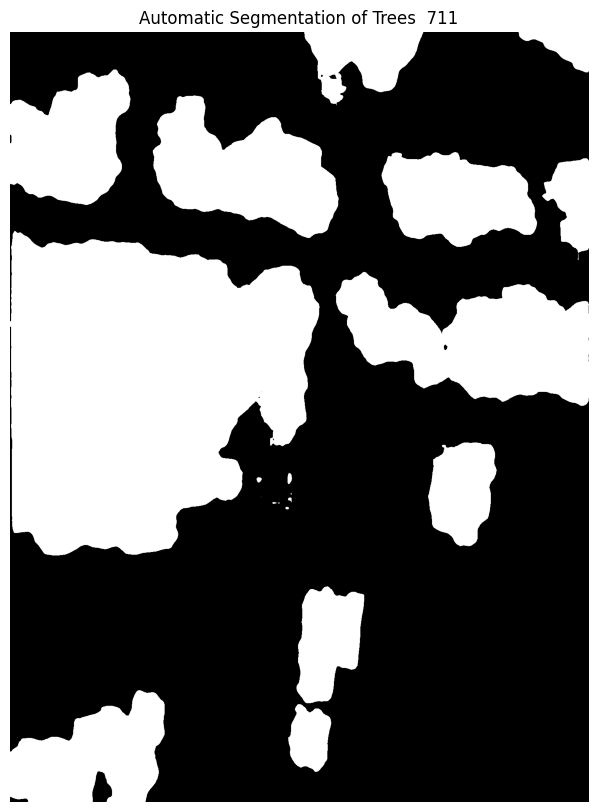

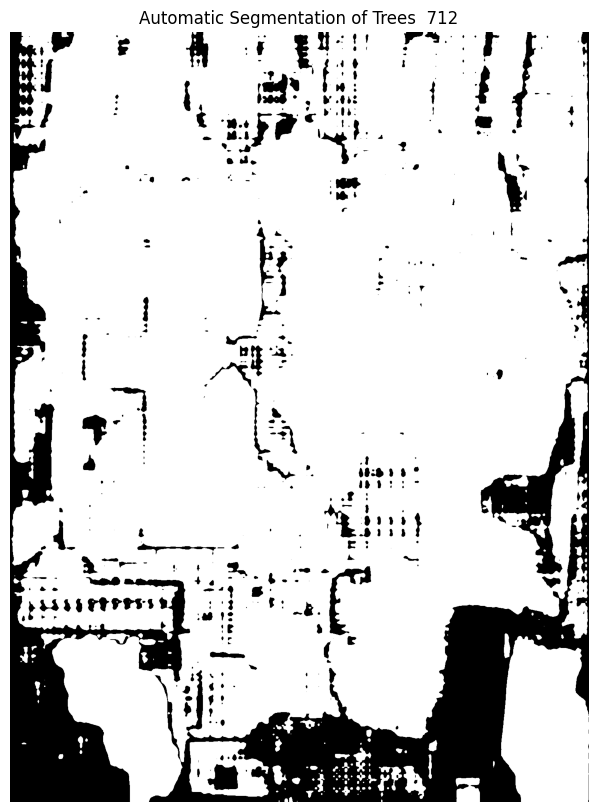

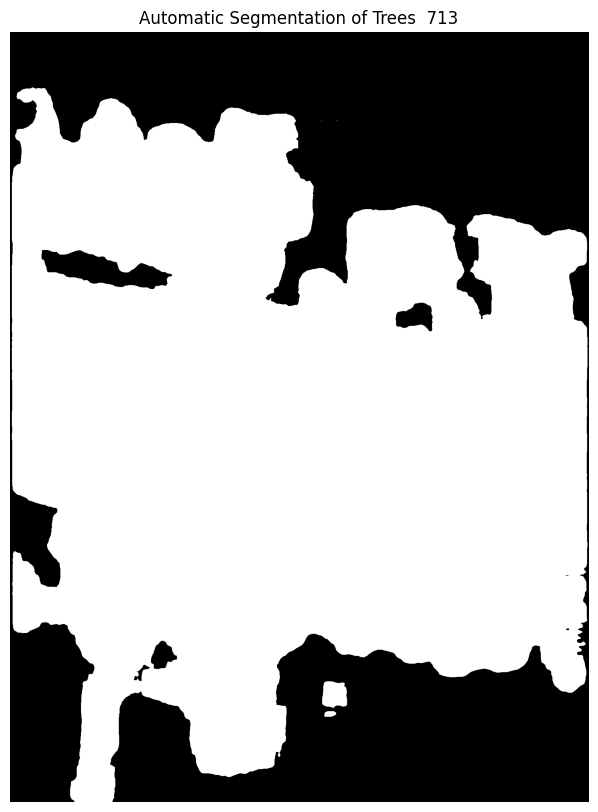

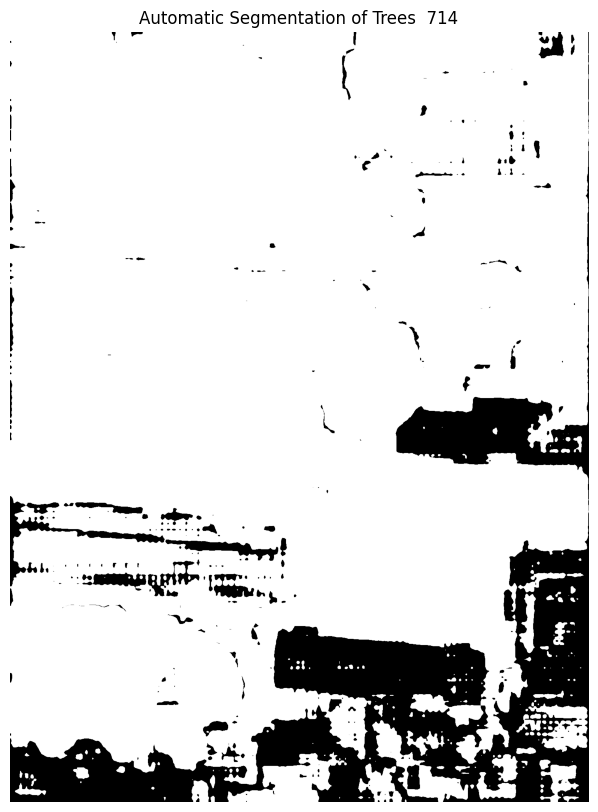

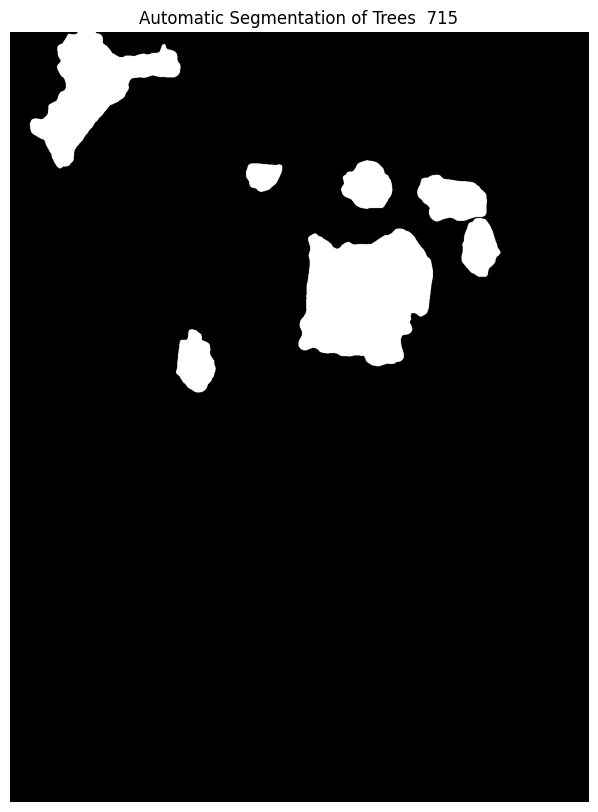

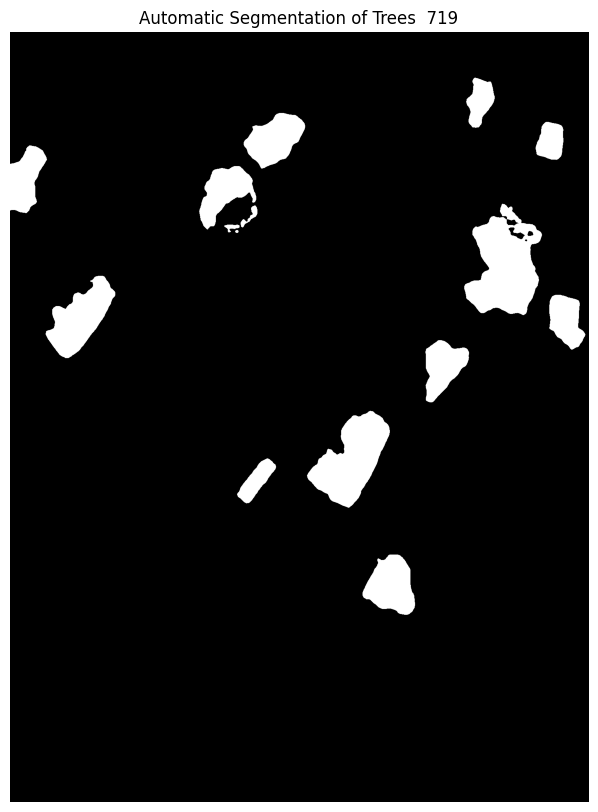

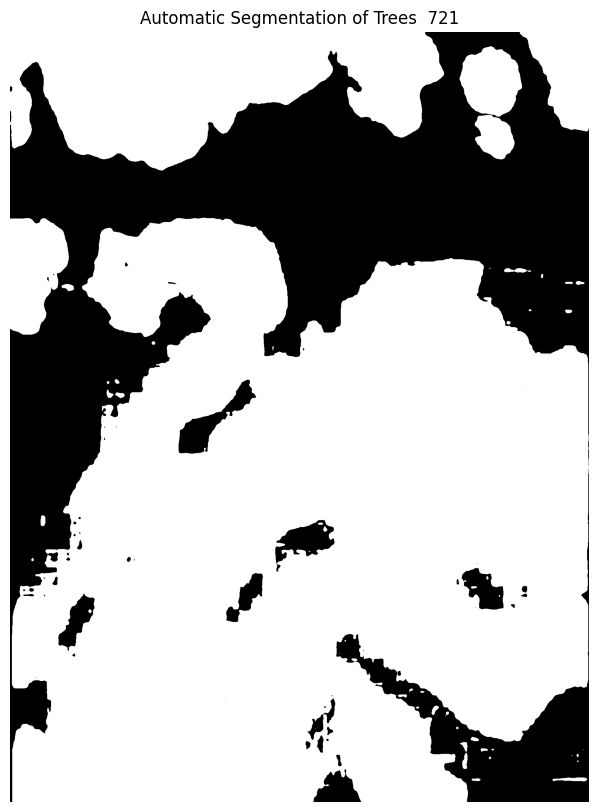

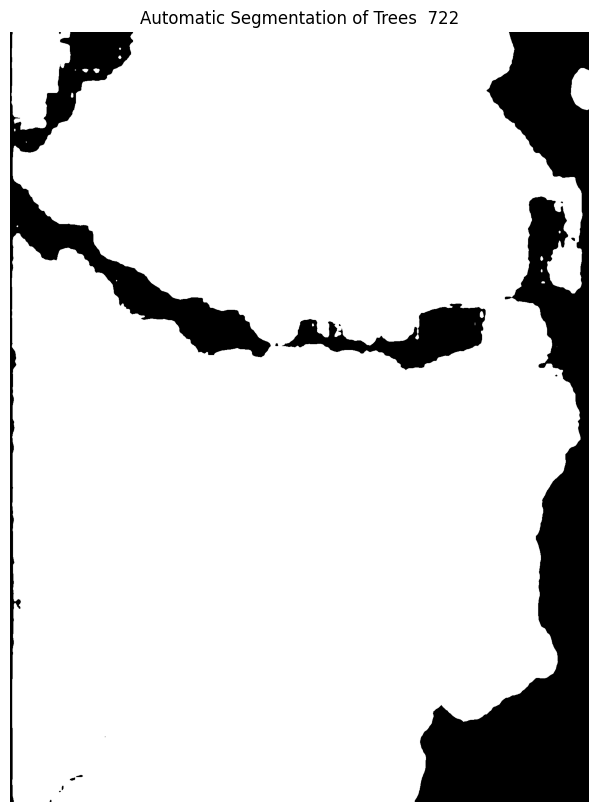

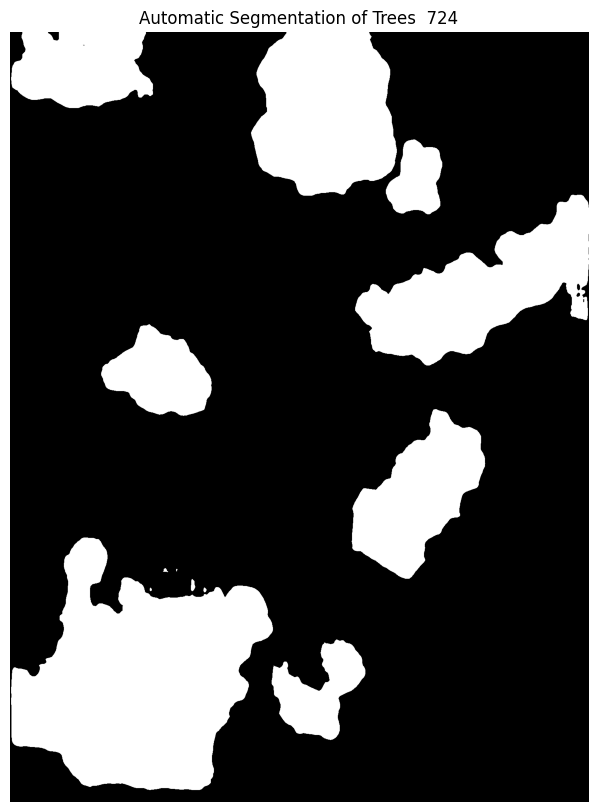

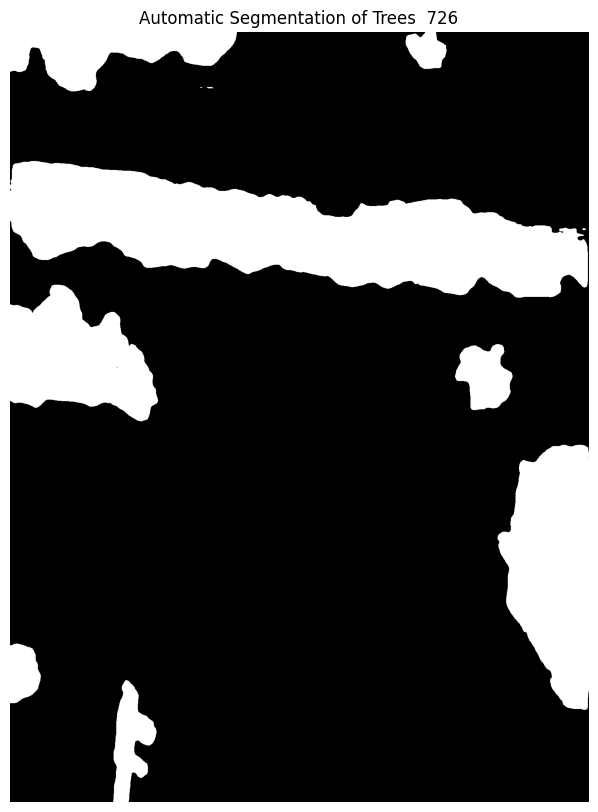

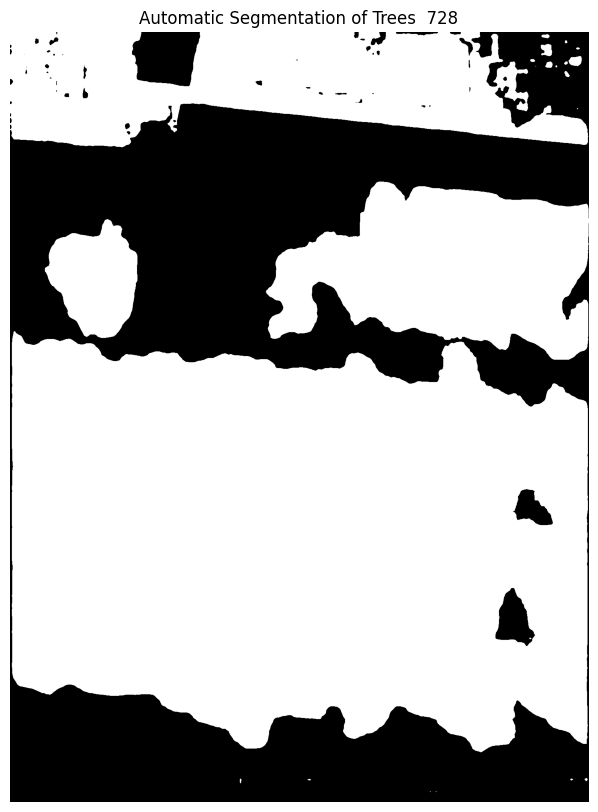

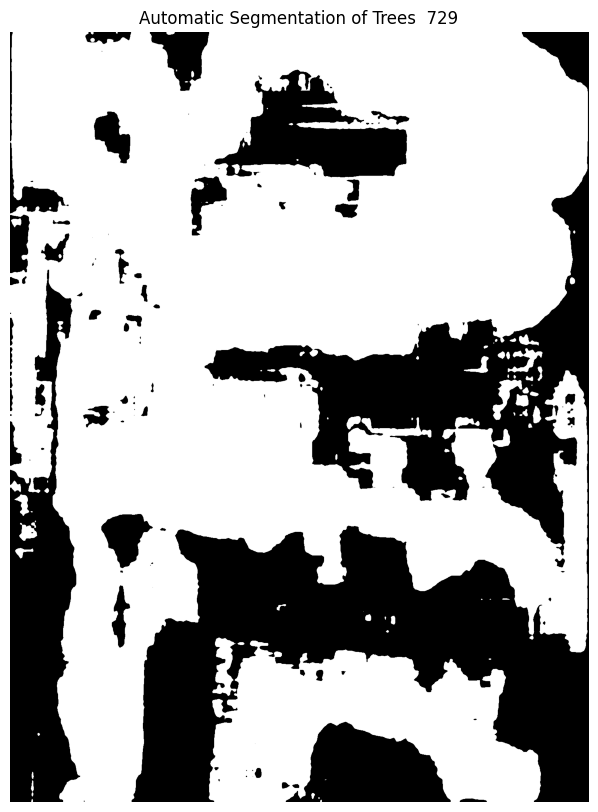

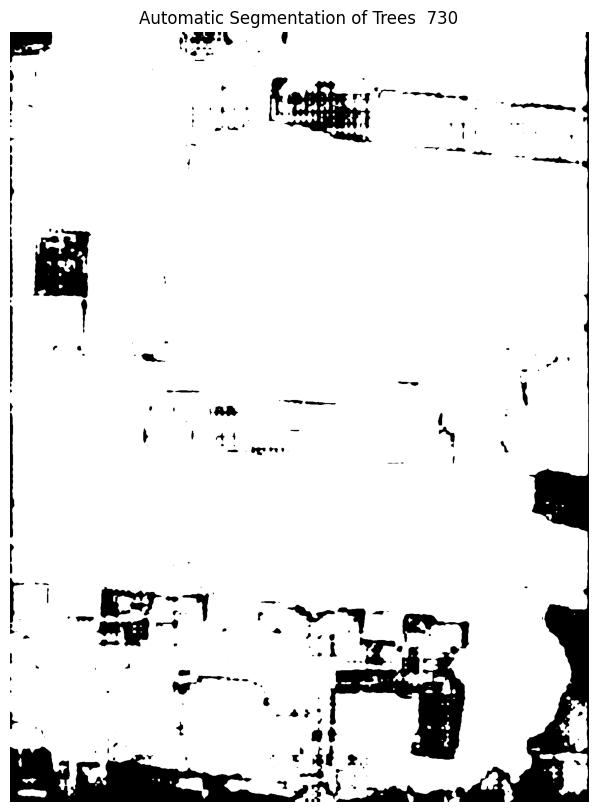

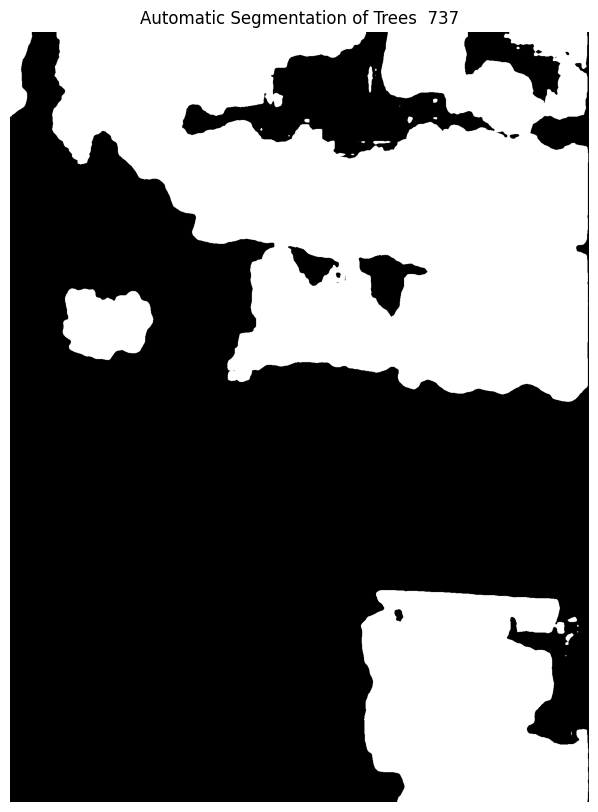

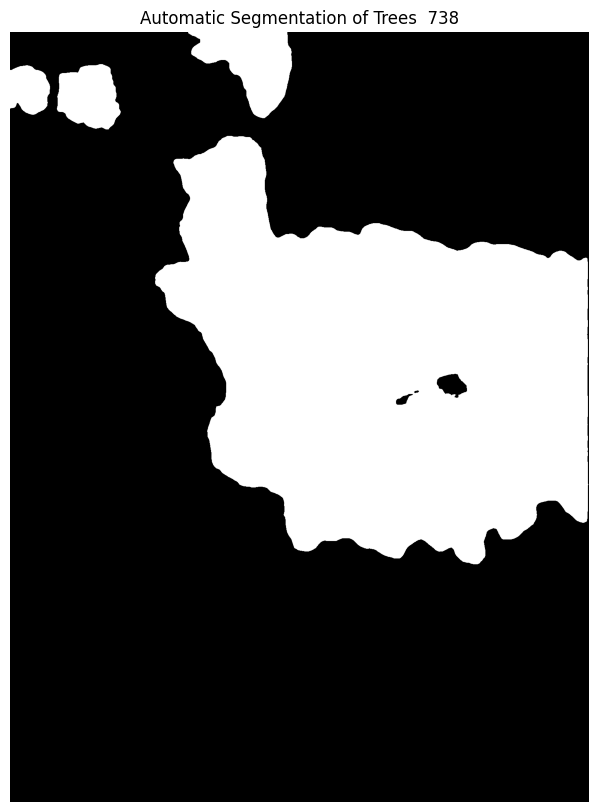

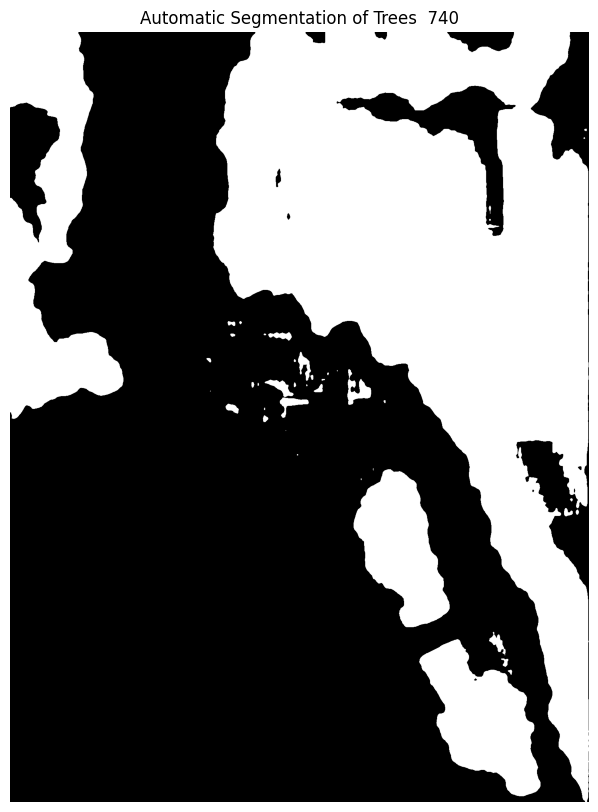

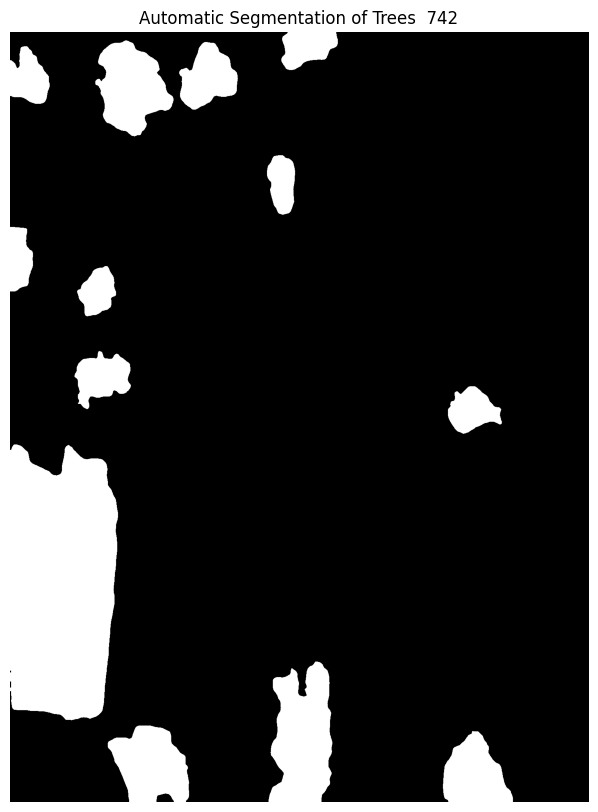

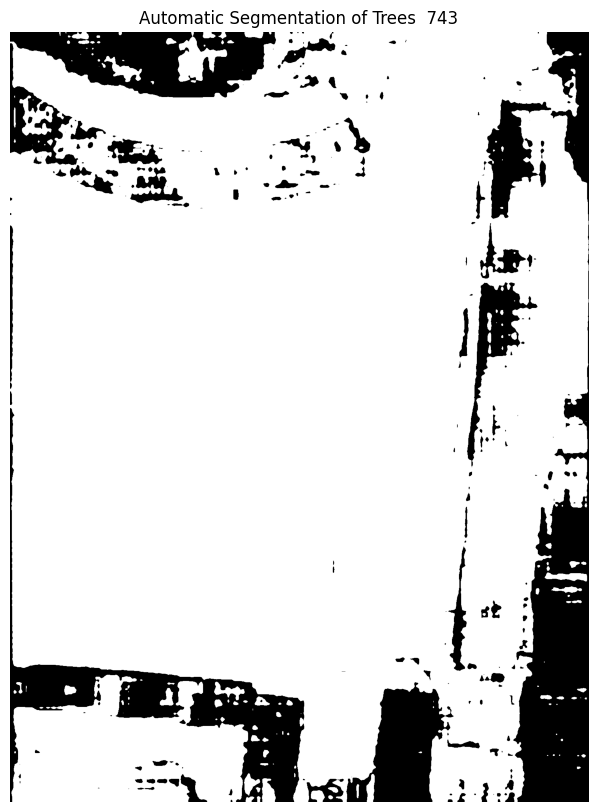

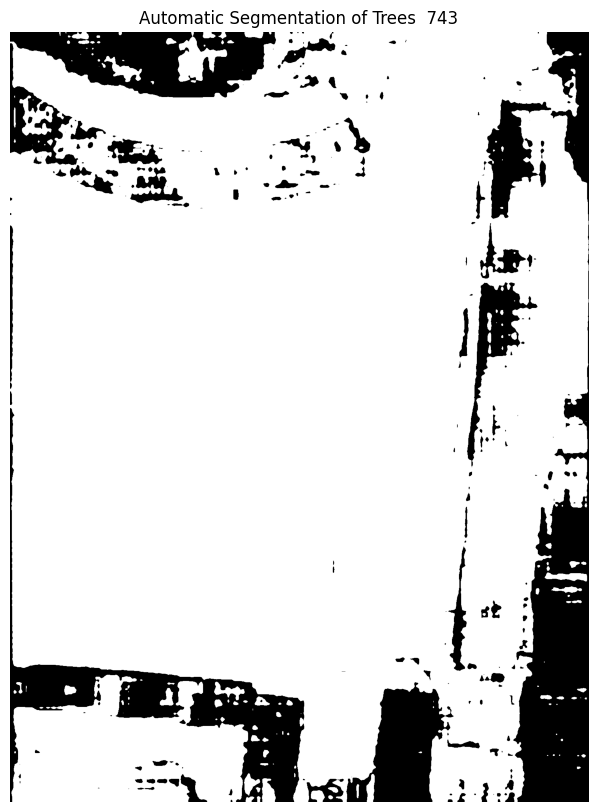

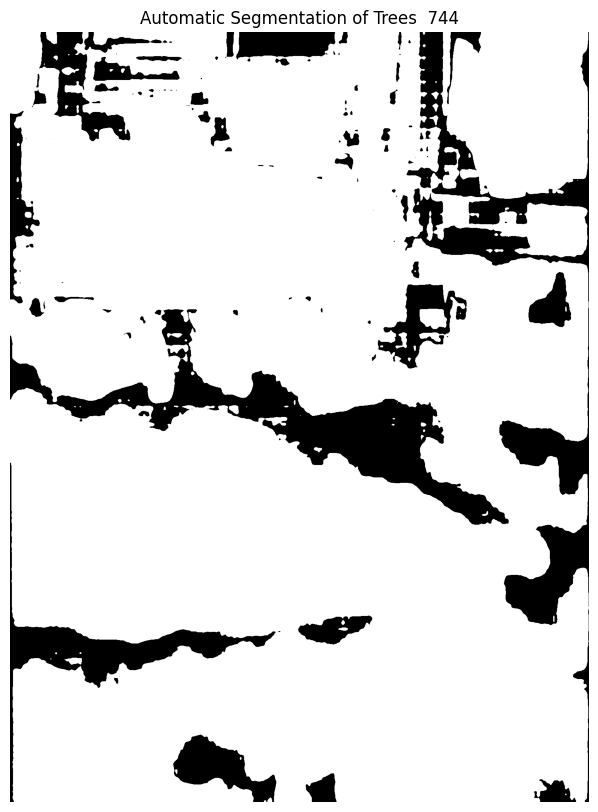

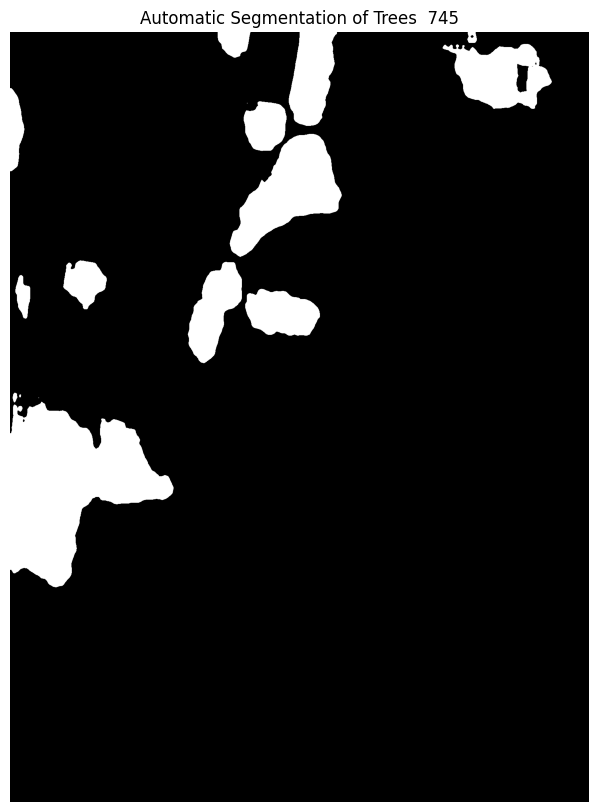

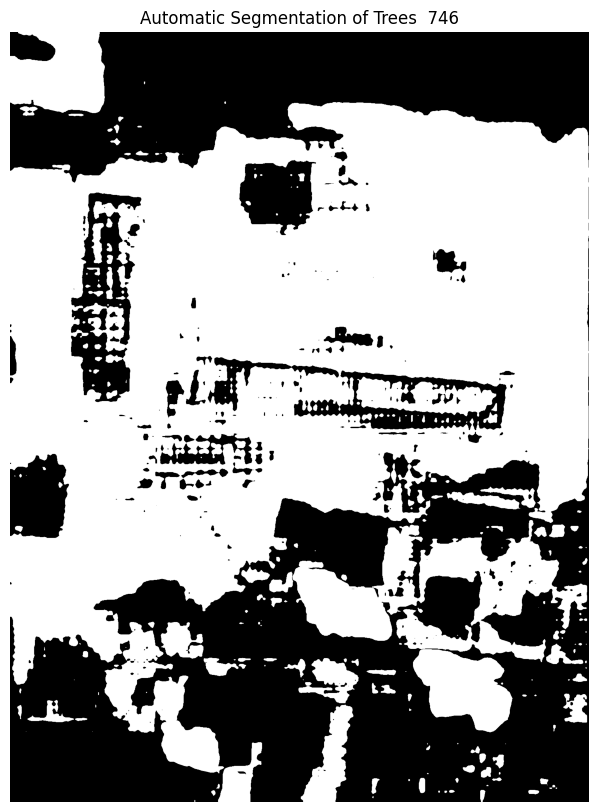

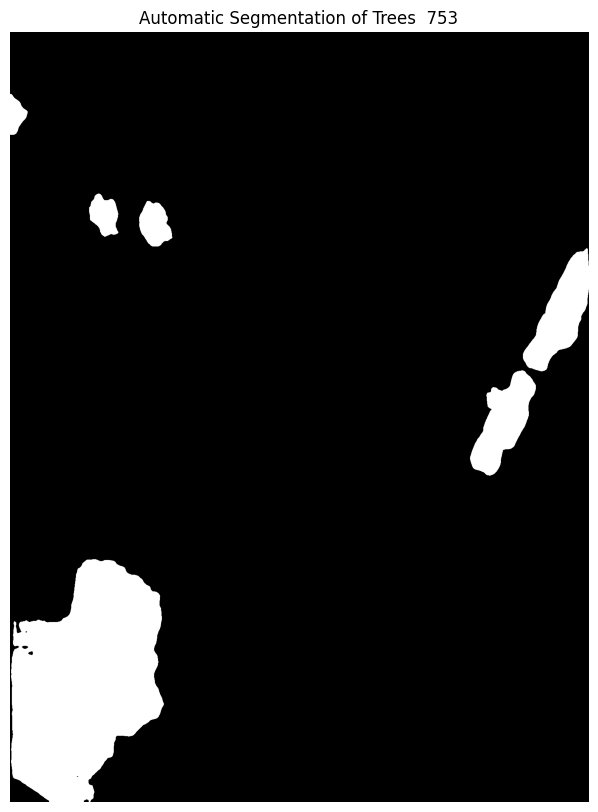

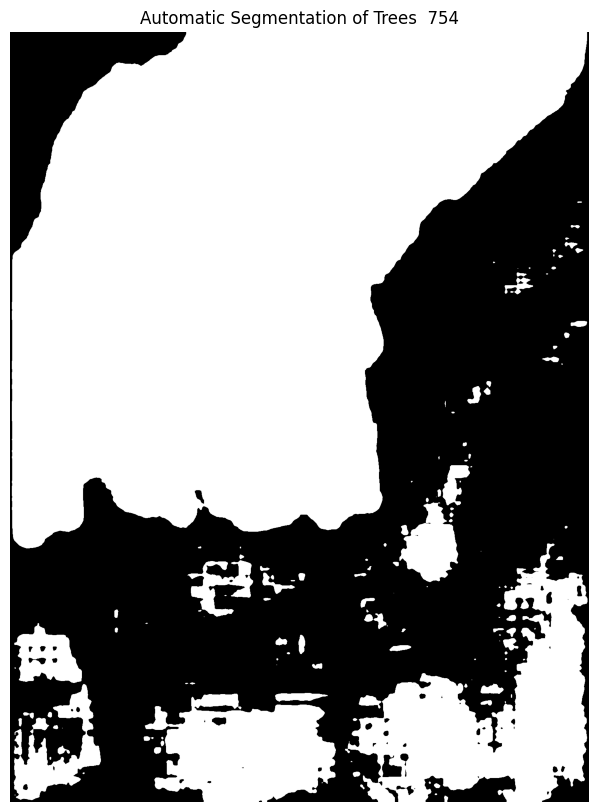

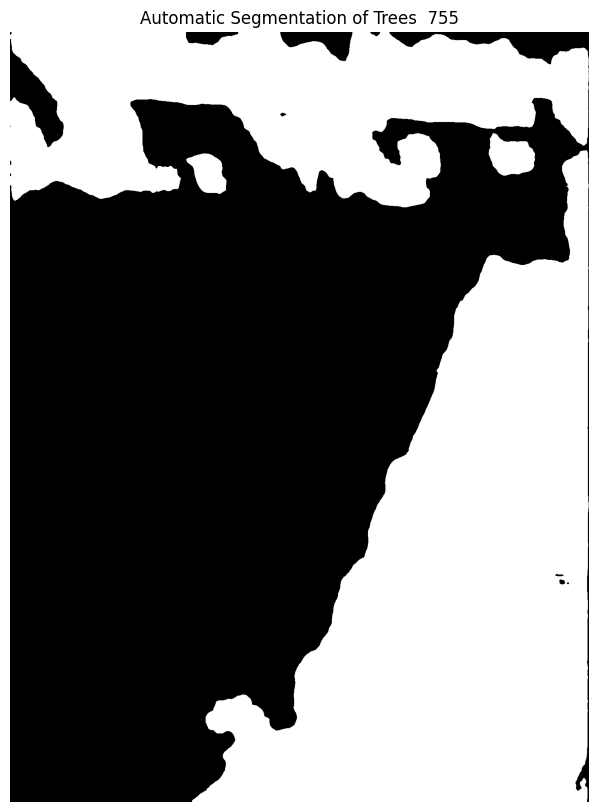

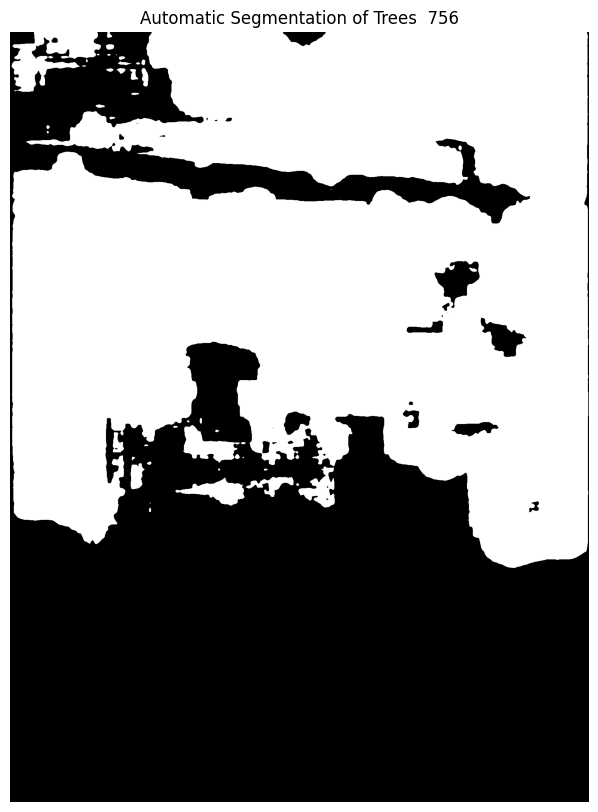

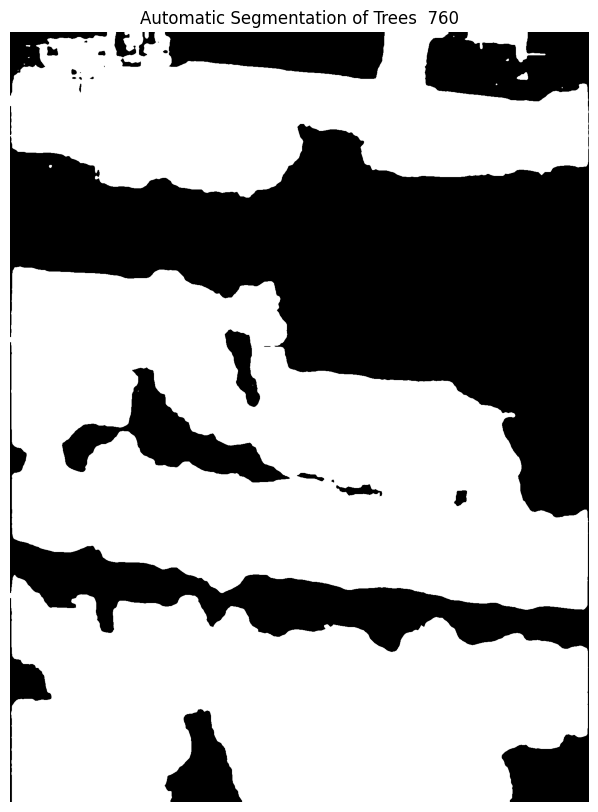

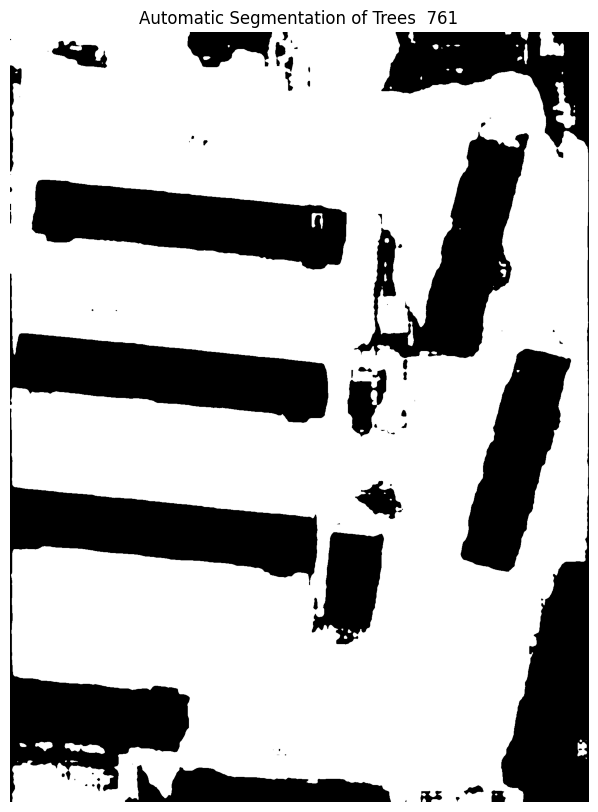

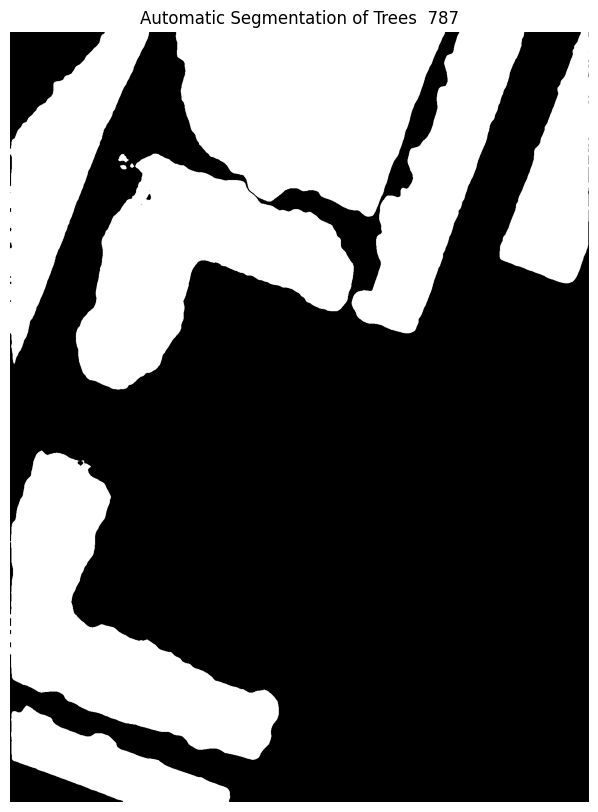

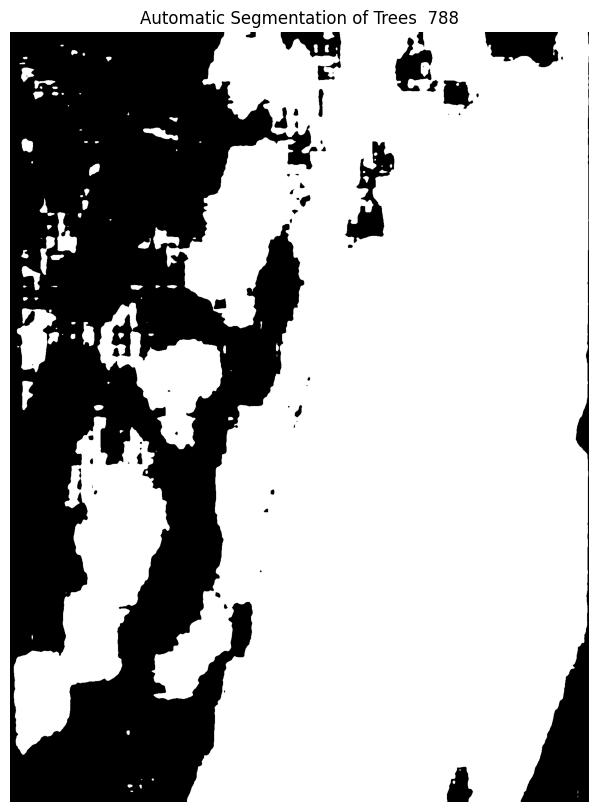

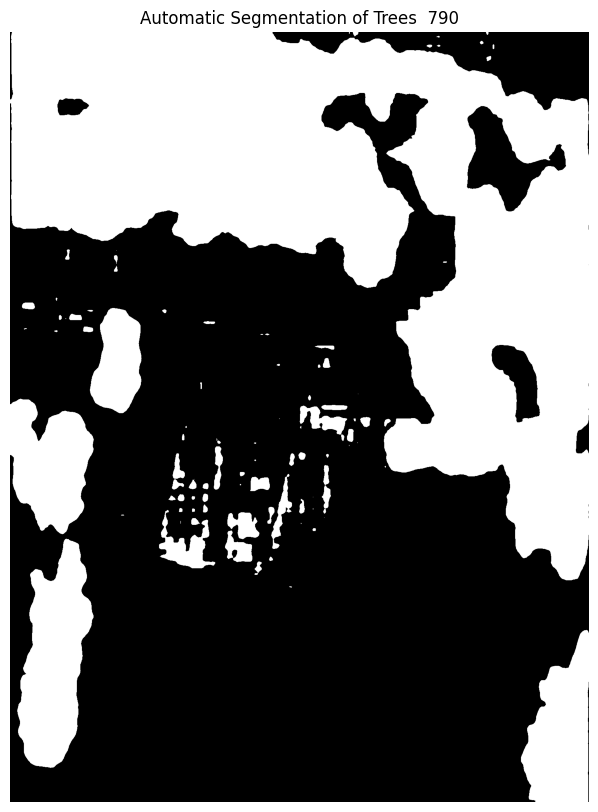

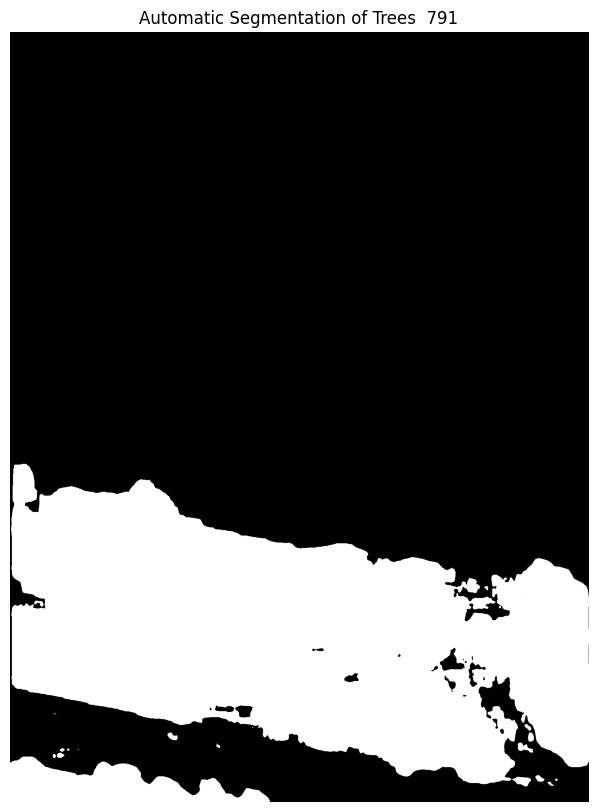

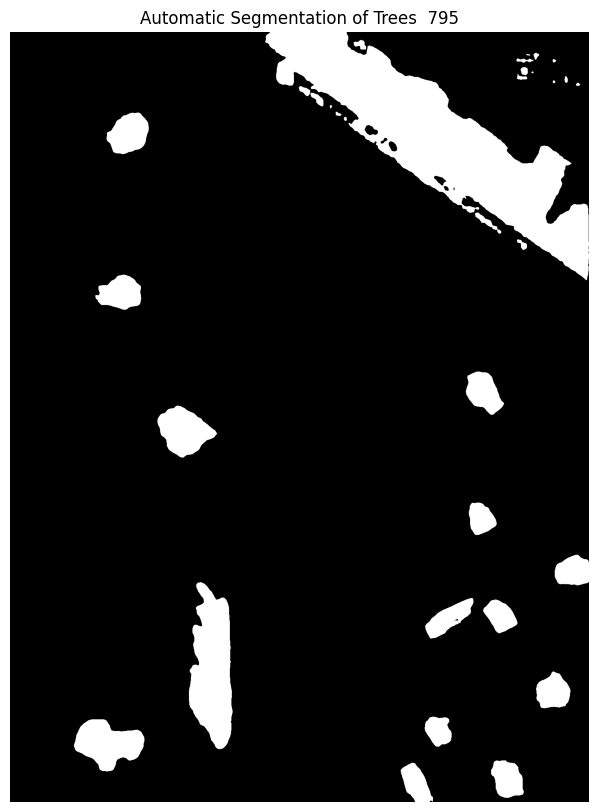

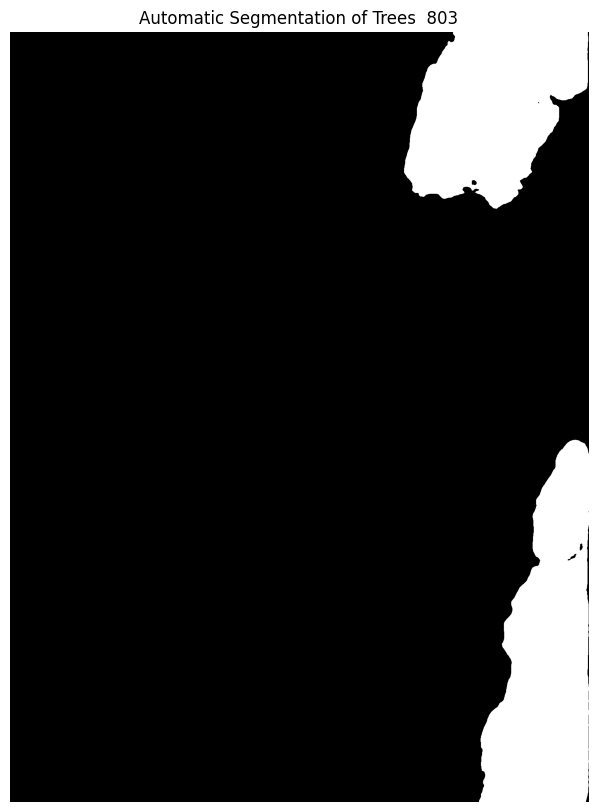

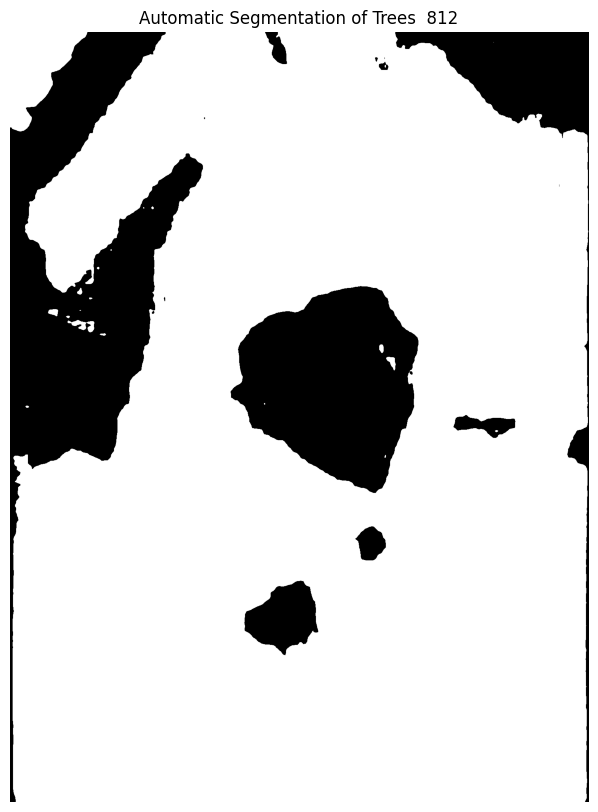

In [45]:
# m.layers[-1].visible = False
# m.add_raster(image_name, layer_name="ImageTest1")
# m

# Assuming `m` is your map object
m.layers[-1].visible = False  # Hide the initial layer

# Now, iterate through all_rectangles and add each image as a raster layer to the map
# for i, bbox in enumerate(rectangles):
for i in errorShapes:
    image_name = f"/Nara/Kaggle/Rasters/ImageNewTest{i}.tif"  # Generate a unique image name for each bbox
    m.add_raster(image_name, layer_name=f"ImageNewTest{i}")
    sam.predict(image_name, text_prompt, box_threshold=0.2949, text_threshold=0.95)
    sam.show_anns(
    cmap='Greys_r',
    add_boxes=False,
    alpha=1,
    title=f"Automatic Segmentation of Trees  {i}",
    blend=False,
    output='trees.tif',
    )
    sam.raster_to_vector("trees.tif", "trees.shp")
    vector_data = gpd.read_file("trees.shp")

    os.makedirs(destination_folder, exist_ok=True)

    # Copy the vector file to your local PC
    destination_file = os.path.join(destination_folder, f"trees{i}.shp")
    shutil.copy("trees.shp", destination_file)

    # # Also, copy associated files (if any) like .shx and .dbf
    shutil.copy("trees.shx", os.path.join(destination_folder, f"trees{i}.shx"))
    shutil.copy("trees.dbf", os.path.join(destination_folder, f"trees{i}.dbf"))
    
    os.remove("trees.tif")
    os.remove("trees.shp")
    

# Display the map with all the raster layers
m

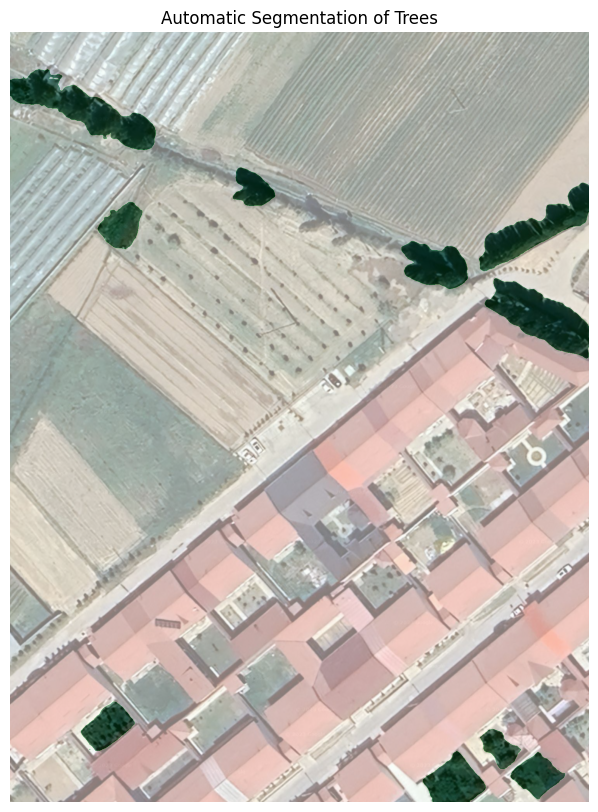

In [ ]:
sam.show_anns(
    cmap='Greens',
    add_boxes=False,
    alpha=0.5,
    title='Automatic Segmentation of Trees',
)

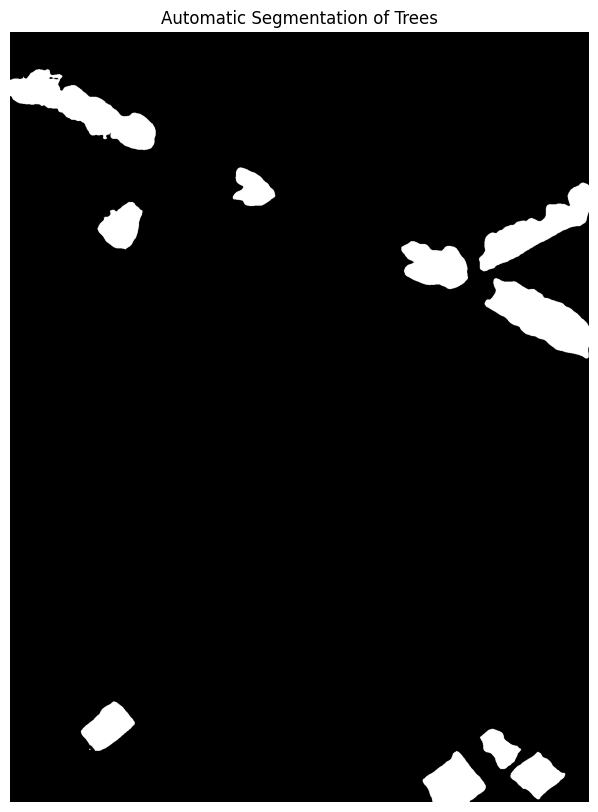

In [ ]:
sam.show_anns(
    cmap='Greys_r',
    add_boxes=False,
    alpha=1,
    title='Automatic Segmentation of Trees',
    blend=False,
    output='trees.tif',
)

In [ ]:
sam.raster_to_vector("trees.tif", "trees.shp")

In [ ]:
m.add_raster("trees.tif", layer_name="Trees", palette="Greens", opacity=0.5, nodata=0)
style = {
    "color": "#3388ff",
    "weight": 2,
    "fillColor": "#7c4185",
    "fillOpacity": 0.5,
}
m.add_vector("trees.shp", layer_name="Vector", style=style)
m

Map(bottom=1569443.0, center=[41.22699999999999, 69.1398], controls=(ZoomControl(options=['position', 'zoom_in…

In [ ]:
sam.show_map()

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…